In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm
import pysam
from Bio.Seq import Seq

In [2]:
import json
f = open('/home/mark/Desktop/chromosome_y/json_dict/HC02666_cluster.json') 
T2T_dict = json.load(f) 

In [3]:
T2T_startStopDict = {key:[] for key in T2T_dict.keys()}
for key in T2T_startStopDict.keys():
    T2T_startStopDict[key].append(T2T_dict[key][0][0].split(" ")[6].strip())
    T2T_startStopDict[key].append(T2T_dict[key][-1][-1].split(" ")[7].strip())

In [4]:
T2T_startStopDict

{'0': ['30356992', '30390716'],
 '1': ['30914883', '30954914'],
 '2': ['31111660', '31169272'],
 '3': ['32374103', '32723822'],
 '4': ['33101658', '33377380'],
 '5': ['34110136', '34383191'],
 '6': ['34912796', '35138020'],
 '7': ['35893285', '36339969'],
 '8': ['37096206', '37407520'],
 '9': ['41007275', '41767991'],
 '10': ['42287355', '42818263'],
 '11': ['43472665', '43863834'],
 '12': ['44601716', '45161406'],
 '13': ['45823709', '46379435'],
 '14': ['46767163', '47207862'],
 '15': ['47532464', '48004636'],
 '16': ['48401760', '49006975'],
 '17': ['49480377', '50167395'],
 '18': ['50569693', '52130779'],
 '19': ['52750341', '52911110'],
 '20': ['53440952', '53489176'],
 '21': ['53936394', '53959790'],
 '22': ['54319004', '54344470'],
 '23': ['54355243', '54375339'],
 '24': ['54385352', '54406552'],
 '25': ['54412952', '54442049']}

In [5]:
samtools='temp'

with open('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/postMay232022/finalized/HC02666_finalized.txt') as f:
    Lines = f.readlines()
    myLines = []
    lineNum = 0

    for line in tqdm(Lines): 
        
        goodLine = ' '.join(line.split())
        samtools=goodLine.split(" ")[5]
        myLines.append(goodLine)

100%|█████████████████████████████████| 22892/22892 [00:00<00:00, 411896.71it/s]


In [6]:
myLines2 = myLines.copy()
myLines3 = myLines.copy()

In [7]:
NRB_Blocks={}
i = 0
firstFlag = 0
keyList = list(T2T_startStopDict.keys())
myKey = 0

for key in tqdm(keyList):
    
    if firstFlag == 0:
    
        NRB_Blocks[key]=str(28352767)+"-"+str(int(T2T_startStopDict[key][0])-1)

        firstFlag=1
        myKey+=1
                
    else:
        
        NRB_Blocks[key]=str(int(T2T_startStopDict[str(int(key)-1)][1])+1)+"-"+str(int(T2T_startStopDict[key][0])-1)
            

100%|███████████████████████████████████████| 26/26 [00:00<00:00, 229100.64it/s]


In [8]:
NRB_Blocks.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25'])

In [9]:
import collections
templist = []

for key in list(NRB_Blocks.keys())[:-3]:
    templist.append([key, 'Spacer Block', (int(NRB_Blocks[key].split("-")[1])-int(NRB_Blocks[key].split("-")[0]))+1, int(NRB_Blocks[key].split("-")[0]), int(NRB_Blocks[key].split("-")[1])])
    templist.append([key, 'Repeat Block', (int(T2T_startStopDict[key][1])-int(T2T_startStopDict[str(key)][0]))+1, int(T2T_startStopDict[key][0]), int(T2T_startStopDict[key][1])])
    
tempDF = pd.DataFrame(data=templist, columns=['Block_Number','Block_Type','Length','Start','End'])
tempDF['SampleName']='HC02666'

In [10]:
tempDF

,Block_Number,Block_Type,Length,Start,End,SampleName
0,0,Spacer Block,2004225,28352767,30356991,HC02666
1,0,Repeat Block,33725,30356992,30390716,HC02666
2,1,Spacer Block,524166,30390717,30914882,HC02666
3,1,Repeat Block,40032,30914883,30954914,HC02666
4,2,Spacer Block,156745,30954915,31111659,HC02666
5,2,Repeat Block,57613,31111660,31169272,HC02666
6,3,Spacer Block,1204830,31169273,32374102,HC02666
7,3,Repeat Block,349720,32374103,32723822,HC02666
8,4,Spacer Block,377835,32723823,33101657,HC02666
9,4,Repeat Block,275723,33101658,33377380,HC02666


In [199]:
#Pull the sequences for the spacer blocks (This is for RepeatMasker)
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/HC02666_spacerSequences_cleaned.fasta', 'a+') as file:
    for row in tempDF.index:
        if str(tempDF.at[row,'Block_Type']) == 'Spacer Block':
            file.write(">"+str(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HC02666.HIFIRW.ONTUL.na.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:"+str(tempDF.at[row,'Start'])+"-"+str(tempDF.at[row,'End'])).split("\n")[0]).split("0000749.")[1])
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HC02666.HIFIRW.ONTUL.na.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:"+str(tempDF.at[row,'Start'])+"-"+str(tempDF.at[row,'End'])).split(str(tempDF.at[row,'End']))[1])
        else:
            continue

file.close()

In [185]:
#Pull the sequences for the spacer blocks
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/HC02666_spacerSequences.fasta', 'a+') as file:
    for row in tempDF.index:
        if str(tempDF.at[row,'Block_Type']) == 'Spacer Block':
            #file.write(">"+str(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HC02666.HIFIRW.ONTUL.na.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:"+str(tempDF.at[row,'Start'])+"-"+str(tempDF.at[row,'End'])).split("\n")[0]).split("0000749.")[1])
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HC02666.HIFIRW.ONTUL.na.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:"+str(tempDF.at[row,'Start'])+"-"+str(tempDF.at[row,'End'])))
        else:
            continue

file.close()

In [12]:
#Make a file with the coordinates for DYZ1 blocks
#with open("/home/mark/Desktop/chromosome_y/nonRepeatBlockSubBlocks/HC02666/HC02666_spacerBlock_DYZ1_regions.tsv", 'a+') as file:
#    for key in NRB_Blocks.keys():
#        file.write(str(key)+"\t"+str(samtools)+"\t"+str(NRB_Blocks[key].split("-")[0])+"\t"+str(NRB_Blocks[key].split("-")[1])+"\n")
#    file.close()

In [13]:
#Make a file with the coordinates for DYZ1 blocks
#with open("/home/mark/Desktop/chromosome_y/nonRepeatBlockSubBlocks/HC02666/HC02666_spacerBlock_DYZ1_regions_samtools.tsv", 'a+') as file:
#    for key in NRB_Blocks.keys():
#        file.write(samtools+":"+str(NRB_Blocks[key])+"\n")
#    file.close()

## Load in HaeIII Restriction Data

In [3]:
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/HC02666_digestion.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/HC02666_digestion_cleaned.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                start=int(line.split("HC02666:")[1].split(",")[0].split("-")[0]) 
                cord1=int(line.split("base")[1].split(" ")[1])
                cord2=int(line.split("base")[2].split(" ")[1])
                file2.write(">HC02666:"+str(start+cord1)+"-"+str(start+cord2)+'\n')
            else:
                file2.write(line)
    file2.close()
file.close()


IndentationError: unexpected indent (30513308.py, line 2)

In [11]:
spacerDictionary = {}
for key in NRB_Blocks.keys():
    spacerDictionary[str(samtools)+":"+str(NRB_Blocks[key])]=key
    #spacerDictionary["HC02666:"+str(NRB_Blocks[key])]=key
spacerDictionary

{'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:28352767-30356991': '0',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:30390717-30914882': '1',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:30954915-31111659': '2',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:31169273-32374102': '3',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:32723823-33101657': '4',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:33377381-34110135': '5',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:34383192-34912795': '6',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:35138021-35893284': '7',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:36339970-37096205': '8',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:37407521-41007274': '9',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:41767992-42287354': '10',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:42818264-43472664': '11',
 'chrY.01-24.01.PAR1-PAR2.

In [12]:
spacerDictionary2 = {}
for key in NRB_Blocks.keys():
    spacerDictionary2["HC02666:"+str(NRB_Blocks[key])]=key
spacerDictionary2

{'HC02666:28352767-30356991': '0',
 'HC02666:30390717-30914882': '1',
 'HC02666:30954915-31111659': '2',
 'HC02666:31169273-32374102': '3',
 'HC02666:32723823-33101657': '4',
 'HC02666:33377381-34110135': '5',
 'HC02666:34383192-34912795': '6',
 'HC02666:35138021-35893284': '7',
 'HC02666:36339970-37096205': '8',
 'HC02666:37407521-41007274': '9',
 'HC02666:41767992-42287354': '10',
 'HC02666:42818264-43472664': '11',
 'HC02666:43863835-44601715': '12',
 'HC02666:45161407-45823708': '13',
 'HC02666:46379436-46767162': '14',
 'HC02666:47207863-47532463': '15',
 'HC02666:48004637-48401759': '16',
 'HC02666:49006976-49480376': '17',
 'HC02666:50167396-50569692': '18',
 'HC02666:52130780-52750340': '19',
 'HC02666:52911111-53440951': '20',
 'HC02666:53489177-53936393': '21',
 'HC02666:53959791-54319003': '22',
 'HC02666:54344471-54355242': '23',
 'HC02666:54375340-54385351': '24',
 'HC02666:54406553-54412951': '25'}

In [13]:
SpacerBlocks={x:[] for x in spacerDictionary.values()}
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/HC02666_Headers.txt') as f:
    Lines = f.readlines()
    
    for line in tqdm(Lines):
        SpacerBlocks[spacerDictionary[line.split(" ")[7].split(",")[0]]].append(str(line.split(" ")[0].split(">")[1])+"_"+str(int(line.split(" ")[7].split(",")[0].split(":")[1].split("-")[0])+int(line.split(" ")[9]))+"-"+str(int(line.split(" ")[7].split(",")[0].split(":")[1].split("-")[0])+int(line.split(" ")[12])))
    f.close()
SpacerBlockList = []
for key in SpacerBlocks.keys():
    for item in SpacerBlocks[key]:
        SpacerBlockList.append([int(key), int(item.split("_")[0]), int(item.split("_")[1].split("-")[0]), int(item.split("_")[1].split("-")[1])])

        tempDF = pd.DataFrame(data=SpacerBlockList, columns=['SpacerBlock','Length','Start','End'])
group = tempDF.groupby("SpacerBlock")
sort_function = lambda x: x.sort_values(by="Start", ascending = True)
desired_df = group.apply(sort_function)

100%|███████████████████████████████████| 4758/4758 [00:00<00:00, 183172.85it/s]


In [14]:
desired_df

SpacerBlock  Length     Start       End
SpacerBlock                                              
0           7               0   11686  28352768  28364453
            1               0  103649  28364454  28468102
            16              0    5427  28468103  28473529
            8               0   10444  28473530  28483973
            427             0    3136  28483974  28487109
...                       ...     ...       ...       ...
22          4724           22    3482  54304796  54308277
            4716           22    3499  54308278  54311776
            4687           22    3543  54311777  54315319
            4688           22    3534  54315320  54318853
            4757           22     151  54318854  54319004

[4758 rows x 4 columns]

In [21]:
#desired_df.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/HC02666_fragmentLengths.csv")

In [20]:
print(collections.Counter(desired_df[desired_df['SpacerBlock']<23]['Length']))
print("Mean: "+str(np.mean(desired_df[desired_df['SpacerBlock']<23]['Length'])))

Counter({3569: 342, 3574: 301, 3564: 275, 3559: 250, 3549: 242, 3544: 238, 3554: 218, 3534: 180, 3539: 178, 3584: 171, 3579: 157, 3529: 112, 3519: 104, 3589: 92, 3558: 84, 3543: 84, 3553: 84, 3548: 84, 3563: 65, 3524: 64, 3568: 56, 3573: 54, 3533: 47, 3594: 45, 819: 34, 3514: 33, 3578: 30, 3518: 29, 3538: 28, 3557: 24, 3583: 24, 1505: 19, 3599: 18, 3503: 18, 3523: 15, 3509: 15, 3588: 14, 3593: 14, 3540: 14, 790: 14, 3513: 13, 3565: 13, 2695: 13, 2666: 13, 3504: 11, 3585: 11, 3580: 11, 3575: 11, 7137: 11, 3604: 10, 3562: 10, 2059: 10, 3535: 9, 3528: 9, 3542: 9, 3572: 9, 3551: 9, 3550: 9, 3508: 8, 3567: 8, 3547: 8, 3498: 7, 1891: 7, 3552: 7, 3570: 7, 1495: 7, 3068: 7, 2685: 7, 3520: 6, 3546: 6, 289: 6, 3537: 6, 3587: 6, 3577: 6, 3609: 6, 3582: 6, 565: 6, 7093: 5, 2661: 5, 5772: 5, 844: 5, 3555: 5, 1070: 5, 2061: 5, 2717: 5, 1114: 4, 3515: 4, 1638: 4, 3522: 4, 290: 4, 3619: 4, 820: 4, 3179: 4, 7107: 4, 5547: 4, 7158: 4, 1397: 4, 5562: 4, 2074: 4, 7156: 4, 3530: 4, 3053: 4, 3492: 4, 7127: 

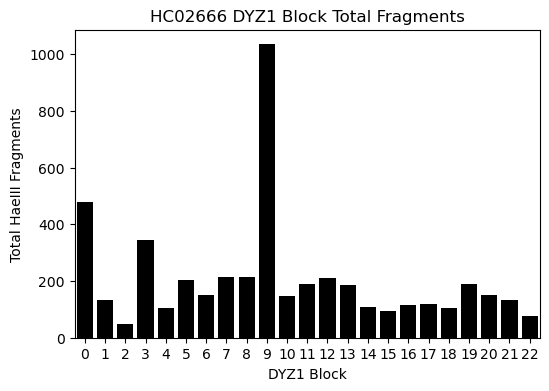

In [24]:
barplotList = []
for key in SpacerBlocks.keys():
    if int(key) < 23:
        barplotList.append([key, len(desired_df[desired_df['SpacerBlock']==int(key)])])
barplotDF = pd.DataFrame(data=barplotList, columns=['SpacerBlock','Total Fragments'])
sns.barplot(data=barplotDF, x='SpacerBlock', y='Total Fragments', color='black')
plt.title("HC02666 DYZ1 Block Total Fragments")
plt.xlabel("DYZ1 Block")
plt.ylabel("Total HaeIII Fragments")

#plt.savefig("/home/mark/Desktop/chromosome_y/Images/DYZ1/HaeIII_Fragments/HC02666_HaeIII_TotalFragments.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [21]:
print("Mean: "+str(np.mean(desired_df[desired_df['SpacerBlock']<23]['Length'])))
print("Median: "+str(np.median(desired_df[desired_df['SpacerBlock']<23]['Length'])))

Mean: 3605.788566624632
Median: 3554.0


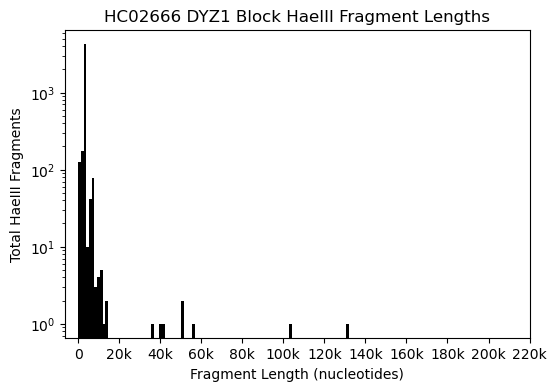

In [29]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 6,4
plt.hist(desired_df[desired_df['SpacerBlock']<23]['Length'], log=True, bins=100, color='black')
plt.title("HC02666 DYZ1 Block HaeIII Fragment Lengths")
plt.xlabel("Fragment Length (nucleotides)")
plt.ylabel("Total HaeIII Fragments")
x = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 220000]
labels = ['0', '20k', '40k', '60k', '80k', '100k', '120k', '140k', '160k', '180k', '200k', '220k']
  
plt.xticks(x, labels, rotation ='horizontal')

#plt.savefig("/home/mark/Desktop/chromosome_y/Images/DYZ1/HaeIII_Fragments/HC02666_HaeIII_Fragments.pdf", dpi=300, bbox_inches='tight')
plt.show()

## Import Repeatmasker and Visualize

In [23]:
desired_df['Coordinates']='temp'
for row in desired_df.index:
    desired_df.at[row,'Coordinates']='HC02666:'+str(desired_df.at[row,'Start'])+"-"+str(desired_df.at[row,'End'])

In [24]:
desired_df2 = desired_df.set_index("Coordinates").copy()
desired_df2

,SpacerBlock,Length,Start,End
Coordinates,,,,
HC02666:28352768-28364453,0,11686,28352768,28364453
HC02666:28364454-28468102,0,103649,28364454,28468102
HC02666:28468103-28473529,0,5427,28468103,28473529
HC02666:28473530-28483973,0,10444,28473530,28483973
HC02666:28483974-28487109,0,3136,28483974,28487109
...,...,...,...,...
HC02666:54304796-54308277,22,3482,54304796,54308277
HC02666:54308278-54311776,22,3499,54308278,54311776
HC02666:54311777-54315319,22,3543,54311777,54315319


In [25]:
sampleDict = {x:'+' for x in desired_df2.index}

In [26]:
spaceBlockDict = {x:{} for x in spacerDictionary.values()}
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/HC02666_digestion_cleaned.fasta.out') as f:
    Lines = f.readlines()
    
    for line in tqdm(Lines):
        
        goodLine = ' '.join(line.split())
        if 'HSATII' in goodLine:
            #print(goodLine)
            sampleDict[str(goodLine.split(" ")[4])]=str(goodLine.split(" ")[8])
        else:
            continue
        
    f.close()

100%|█████████████████████████████████| 50989/50989 [00:00<00:00, 387817.24it/s]


In [27]:
sampleDict

{'HC02666:28352768-28364453': 'C',
 'HC02666:28364454-28468102': 'C',
 'HC02666:28468103-28473529': 'C',
 'HC02666:28473530-28483973': 'C',
 'HC02666:28483974-28487109': 'C',
 'HC02666:28487110-28488218': 'C',
 'HC02666:28488219-28490245': 'C',
 'HC02666:28490246-28493366': 'C',
 'HC02666:28493367-28496497': 'C',
 'HC02666:28496498-28497611': 'C',
 'HC02666:28497612-28499618': 'C',
 'HC02666:28499619-28502754': 'C',
 'HC02666:28502755-28503868': 'C',
 'HC02666:28503869-28505875': 'C',
 'HC02666:28505876-28509006': 'C',
 'HC02666:28509007-28510120': 'C',
 'HC02666:28510121-28512146': 'C',
 'HC02666:28512147-28515267': 'C',
 'HC02666:28515268-28516381': 'C',
 'HC02666:28516382-28518398': 'C',
 'HC02666:28518399-28522627': 'C',
 'HC02666:28522628-28525738': 'C',
 'HC02666:28525739-28527745': 'C',
 'HC02666:28527746-28569299': 'C',
 'HC02666:28569300-28569479': '+',
 'HC02666:28569480-28577992': 'C',
 'HC02666:28577993-28578172': '+',
 'HC02666:28578173-28581093': 'C',
 'HC02666:28581094-2

In [28]:
desired_df2['Orientation']=[x for x in sampleDict.values()]
desired_df2

,SpacerBlock,Length,Start,End,Orientation
Coordinates,,,,,
HC02666:28352768-28364453,0,11686,28352768,28364453,C
HC02666:28364454-28468102,0,103649,28364454,28468102,C
HC02666:28468103-28473529,0,5427,28468103,28473529,C
HC02666:28473530-28483973,0,10444,28473530,28483973,C
HC02666:28483974-28487109,0,3136,28483974,28487109,C
...,...,...,...,...,...
HC02666:54304796-54308277,22,3482,54304796,54308277,C
HC02666:54308278-54311776,22,3499,54308278,54311776,C
HC02666:54311777-54315319,22,3543,54311777,54315319,C


In [29]:
#desired_df2 = desired_df[desired_df['SpacerBlock']<23].copy()
#desired_df2['Orientation']='temp'
desired_df2['Color']='black'

In [30]:
for row in desired_df2.index:
    if desired_df2.at[row,'Orientation'] == '+':
        desired_df2.at[row,'Color']='blue'
    elif desired_df2.at[row,'Orientation'] == 'C':
        desired_df2.at[row,'Color']='red'
    else:
        continue

In [31]:
desired_df2

,SpacerBlock,Length,Start,End,Orientation,Color
Coordinates,,,,,,
HC02666:28352768-28364453,0,11686,28352768,28364453,C,red
HC02666:28364454-28468102,0,103649,28364454,28468102,C,red
HC02666:28468103-28473529,0,5427,28468103,28473529,C,red
HC02666:28473530-28483973,0,10444,28473530,28483973,C,red
HC02666:28483974-28487109,0,3136,28483974,28487109,C,red
...,...,...,...,...,...,...
HC02666:54304796-54308277,22,3482,54304796,54308277,C,red
HC02666:54308278-54311776,22,3499,54308278,54311776,C,red
HC02666:54311777-54315319,22,3543,54311777,54315319,C,red


In [32]:
print(collections.Counter(desired_df2['Orientation']))
print(collections.Counter(desired_df2['Color']))

Counter({'C': 4468, '+': 290})
Counter({'red': 4468, 'blue': 290})


In [33]:
#####################################################################################

In [34]:
rb_df = desired_df2.copy()

In [31]:
lengthSizes = ['<1k','1-5k', '5-10k', '10-20k', '20-40k', '40-100k', '100-200k']

In [32]:
columns=[str(o)+"_"+str(y) for y in lengthSizes for o in ["C","+"]]
abundanceDF = pd.DataFrame(index=[x for x in set(desired_df2['SpacerBlock'])], columns=columns).fillna(0)
for row in desired_df2.index:
    if str(desired_df2.at[row,'Color']) == 'red':
        if int(desired_df2.at[row,'Length']) <= 1000 :
            abundanceDF.at[desired_df2.at[row,'SpacerBlock'], 'C_<1k'] +=desired_df2.at[row,'Length']
            
        elif int(desired_df2.at[row,'Length']) > 1000 and  int(desired_df2.at[row,'Length']) <= 5000:
            abundanceDF.at[desired_df2.at[row,'SpacerBlock'], 'C_1-5k'] +=desired_df2.at[row,'Length']
        
        
        elif int(desired_df2.at[row,'Length']) > 5000 and  int(desired_df2.at[row,'Length']) <= 10000:
            abundanceDF.at[desired_df2.at[row,'SpacerBlock'], 'C_5-10k'] +=desired_df2.at[row,'Length']
        
        
        elif int(desired_df2.at[row,'Length']) > 10000 and  int(desired_df2.at[row,'Length']) <= 20000:
            abundanceDF.at[desired_df2.at[row,'SpacerBlock'], 'C_10-20k'] +=desired_df2.at[row,'Length']
        
        
        elif int(desired_df2.at[row,'Length']) > 20000 and  int(desired_df2.at[row,'Length']) <= 40000:
            abundanceDF.at[desired_df2.at[row,'SpacerBlock'], 'C_20-40k'] +=desired_df2.at[row,'Length']
        
        
        elif int(desired_df2.at[row,'Length']) > 40000 and  int(desired_df2.at[row,'Length']) <= 100000:
            abundanceDF.at[desired_df2.at[row,'SpacerBlock'], 'C_40-100k'] +=desired_df2.at[row,'Length']
            
        elif int(desired_df2.at[row,'Length']) > 100000 and  int(desired_df2.at[row,'Length']) <= 200000:
            abundanceDF.at[desired_df2.at[row,'SpacerBlock'], 'C_100-200k'] +=desired_df2.at[row,'Length']
            
        else:
            continue
            
    elif str(desired_df2.at[row,'Color']) == 'blue' or str(desired_df2.at[row,'Color']) == 'black':
        if int(desired_df2.at[row,'Length']) <= 1000 :
            abundanceDF.at[desired_df2.at[row,'SpacerBlock'], '+_<1k'] +=desired_df2.at[row,'Length']
            
        elif int(desired_df2.at[row,'Length']) > 1000 and  int(desired_df2.at[row,'Length']) <= 5000:
            abundanceDF.at[desired_df2.at[row,'SpacerBlock'], '+_1-5k'] +=desired_df2.at[row,'Length']
        
        
        elif int(desired_df2.at[row,'Length']) > 5000 and  int(desired_df2.at[row,'Length']) <= 10000:
            abundanceDF.at[desired_df2.at[row,'SpacerBlock'], '+_5-10k'] +=desired_df2.at[row,'Length']
        
        
        elif int(desired_df2.at[row,'Length']) > 10000 and  int(desired_df2.at[row,'Length']) <= 20000:
            abundanceDF.at[desired_df2.at[row,'SpacerBlock'], '+_10-20k'] +=desired_df2.at[row,'Length']
        
        
        elif int(desired_df2.at[row,'Length']) > 20000 and  int(desired_df2.at[row,'Length']) <= 40000:
            abundanceDF.at[desired_df2.at[row,'SpacerBlock'], '+_20-40k'] +=desired_df2.at[row,'Length']
        
        
        elif int(desired_df2.at[row,'Length']) > 40000 and  int(desired_df2.at[row,'Length']) <= 100000:
            abundanceDF.at[desired_df2.at[row,'SpacerBlock'], '+_40-100k'] +=desired_df2.at[row,'Length']
            
        elif int(desired_df2.at[row,'Length']) > 100000 and  int(desired_df2.at[row,'Length']) <= 200000:
            abundanceDF.at[desired_df2.at[row,'SpacerBlock'], '+_100-200k'] +=desired_df2.at[row,'Length']
            
        else:
            continue
            
    else:
        continue

In [33]:
from scipy.spatial import distance
heatDF_mInfo3 = pd.DataFrame(index=abundanceDF.sort_index().index, columns=abundanceDF.sort_index().index).fillna(0.0)
for index in heatDF_mInfo3.index:
    for column in heatDF_mInfo3.columns:
        heatDF_mInfo3.at[index,column]= 1-float(distance.braycurtis(list(abundanceDF.loc[index]), list(abundanceDF.loc[column])))
heatDF_mInfo3.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.000000,0.0003,0.153205,0.776912,0.335650,0.562117,0.441056,0.574960,0.573337,0.587169,...,0.521809,0.343174,0.294383,0.348897,0.369712,0.324507,0.485953,0.00030,0.383548,0.266420
1,0.000300,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001930,0.001778,0.000000,0.000000,0.000000,0.82823,0.000103,0.000000
2,0.153205,0.0000,1.000000,0.230241,0.582401,0.350957,0.452027,0.337782,0.343370,0.082986,...,0.382181,0.565796,0.649151,0.564152,0.493263,0.558022,0.403823,0.00000,0.519056,0.607588
3,0.776912,0.0000,0.230241,1.000000,0.464007,0.745372,0.610694,0.770641,0.770097,0.501022,...,0.709432,0.486924,0.423402,0.494776,0.513433,0.469820,0.665501,0.00000,0.540416,0.264777
4,0.335650,0.0000,0.582401,0.464007,1.000000,0.680410,0.808072,0.644512,0.647550,0.184626,...,0.706030,0.920038,0.920280,0.928061,0.887131,0.848987,0.735297,0.00000,0.871843,0.557996


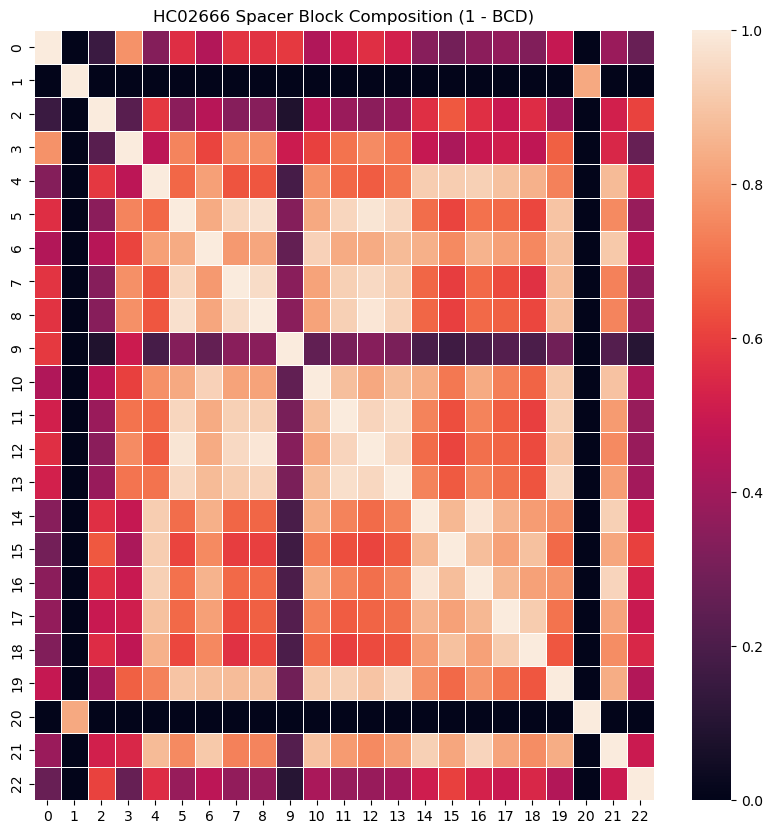

In [34]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 10,10
sns.heatmap(data=heatDF_mInfo3.sort_index(), linewidths=.7, annot=False, vmin=0)
plt.title("HC02666 Spacer Block Composition (1 - BCD)")
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HC02666/HC02666_HaeIII_Heatmap.pdf", dpi=300, bbox_inches='tight')
plt.show()

# Clusters

In [35]:
#Only run if you want to remove DYZ1s
#for row in rb_df.index:
#    if int(rb_df.at[row,'Length']) <= 3800 and int(rb_df.at[row,'Length']) >= 3200:
#        rb_df.at[row,'Color']='Yellow'
#    else:
#        continue

In [35]:
import pysam
from Bio.Seq import Seq

In [36]:
def split(word):
    return [char for char in word]

tempList = {}

#All Rows
for row in rb_df.index:
    
#Comment this out for all fragments
#for row in rb_df[(rb_df['Color']!='')].index:
    
# 2nd Pass BlueRows
#for row in rb_df.loc[BlackRows].index:
    
    
    tempDict = {}
    
    sequence = (pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HC02666.HIFIRW.ONTUL.na.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End'])))

    if rb_df.at[row,'Color'] == 'blue':
        
        
        mySeq1 = sequence.split("HC02666:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End']))[1].strip()
        seq = Seq(mySeq1)
        mySeq = split(seq.reverse_complement())
        
    else:
        #print(split(sequence.split("chrY:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End']))))
        mySeq = (split(sequence.split("HC02666:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End']))[1].strip()))
    
    goodSeq = []
    for x in mySeq:
        if str(x) != '\n':
            goodSeq.append(str(x))
        else:
            continue

    
    i=0
    while i < len(goodSeq):
        
        if len(str(''.join(goodSeq[i:i+5])).strip()) > 4:
            if str(''.join(goodSeq[i:i+5])) in tempDict.keys():
                tempDict[str(''.join(goodSeq[i:i+5]))]+=1
            else:
                tempDict[str(''.join(goodSeq[i:i+5]))]=1

        i+=1
        
    tempList["HC02666:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End'])]=tempDict


In [37]:
allKeys = []
for key in tempList.keys():
    for kmer in tempList[key]:
        if kmer in allKeys:
            continue
        else:
            allKeys.append(kmer)
            
kmerDF = pd.DataFrame(index=[x for x in tempList.keys()], columns=[x for x in set(allKeys)]).fillna(0)
kmerDF

,GATGG,GCGCT,GCTCG,CCATT,GGAAA,GCGCA,GTCCT,TTGAC,CTGTG,ACTGA,...,ATCTA,GACGT,AAAGT,TCAGT,TCCAA,ACAAA,GCAGT,GTACA,TTGGG,TAGCG
HC02666:28352768-28364453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HC02666:28364454-28468102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HC02666:28468103-28473529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HC02666:28473530-28483973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HC02666:28483974-28487109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC02666:54304796-54308277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HC02666:54308278-54311776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HC02666:54311777-54315319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HC02666:54315320-54318853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
kmerDF['AGGCC'] = 0
kmerDF['GGCCT'] = 0

/tmp/ipykernel_9118/1239353834.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmerDF['AGGCC'] = 0
/tmp/ipykernel_9118/1239353834.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmerDF['GGCCT'] = 0


In [39]:
for key in tqdm(tempList.keys()):
    for kmer in tempList[key]:
        kmerDF.at[str(key),str(kmer)]= int(tempList[key][kmer])
kmerDF

100%|██████████████████████████████████████| 4758/4758 [00:10<00:00, 433.75it/s]


,GATGG,GCGCT,GCTCG,CCATT,GGAAA,GCGCA,GTCCT,TTGAC,CTGTG,ACTGA,...,AAAGT,TCAGT,TCCAA,ACAAA,GCAGT,GTACA,TTGGG,TAGCG,AGGCC,GGCCT
HC02666:28352768-28364453,7,0,0,0,53,0,0,3,4,20,...,3,5,8,10,30,1,4,0,0,0
HC02666:28364454-28468102,37,2,0,1,512,6,0,36,65,182,...,9,34,95,53,306,38,10,1,0,0
HC02666:28468103-28473529,2,0,0,0,26,0,0,2,3,10,...,0,2,6,2,17,2,0,0,0,0
HC02666:28473530-28483973,5,0,0,0,51,0,0,4,7,17,...,1,4,13,3,29,3,0,0,0,0
HC02666:28483974-28487109,1,0,0,0,15,1,1,0,0,8,...,2,1,4,2,10,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC02666:54304796-54308277,2,0,2,0,23,0,2,3,0,5,...,4,1,6,1,1,0,1,0,0,0
HC02666:54308278-54311776,2,0,1,0,29,0,1,3,0,2,...,3,0,7,1,1,0,0,0,0,0
HC02666:54311777-54315319,2,0,1,1,28,0,1,3,0,3,...,5,0,7,1,2,0,0,0,0,0
HC02666:54315320-54318853,2,0,0,0,25,0,1,3,0,4,...,4,0,6,1,2,0,0,0,0,0


In [40]:
#kmerDF.to_csv('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HC02666/Kmer_DF.csv')

In [41]:
def prevalenceFilter(df):
    dfo = df.copy()
    dfo2 = dfo.div(dfo.sum(axis=1), axis=0).copy()            
    return(dfo2)

In [42]:
import composition_stats as cs

In [43]:
def clrTransformation(df):
    #CLR Transform the relative abundnace dataframe
    df2 = df.copy()

    for row in df.index:
        df2.loc[row] = cs.clr(np.array(df.loc[row].replace(0.0, 1e-10)))
    
    return(df2)

In [44]:
abundanceKmer = prevalenceFilter(kmerDF)
abundanceKmer

,GATGG,GCGCT,GCTCG,CCATT,GGAAA,GCGCA,GTCCT,TTGAC,CTGTG,ACTGA,...,AAAGT,TCAGT,TCCAA,ACAAA,GCAGT,GTACA,TTGGG,TAGCG,AGGCC,GGCCT
HC02666:28352768-28364453,0.000599,0.000000,0.000000,0.000000,0.004537,0.000000,0.000000,0.000257,0.000342,0.001712,...,0.000257,0.000428,0.000685,0.000856,0.002568,0.000086,0.000342,0.00000,0.0,0.0
HC02666:28364454-28468102,0.000357,0.000019,0.000000,0.000010,0.004940,0.000058,0.000000,0.000347,0.000627,0.001756,...,0.000087,0.000328,0.000917,0.000511,0.002952,0.000367,0.000096,0.00001,0.0,0.0
HC02666:28468103-28473529,0.000369,0.000000,0.000000,0.000000,0.004794,0.000000,0.000000,0.000369,0.000553,0.001844,...,0.000000,0.000369,0.001106,0.000369,0.003135,0.000369,0.000000,0.00000,0.0,0.0
HC02666:28473530-28483973,0.000479,0.000000,0.000000,0.000000,0.004885,0.000000,0.000000,0.000383,0.000670,0.001628,...,0.000096,0.000383,0.001245,0.000287,0.002778,0.000287,0.000000,0.00000,0.0,0.0
HC02666:28483974-28487109,0.000319,0.000000,0.000000,0.000000,0.004789,0.000319,0.000319,0.000000,0.000000,0.002554,...,0.000639,0.000319,0.001277,0.000639,0.003193,0.000000,0.000319,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC02666:54304796-54308277,0.000575,0.000000,0.000575,0.000000,0.006613,0.000000,0.000575,0.000863,0.000000,0.001438,...,0.001150,0.000288,0.001725,0.000288,0.000288,0.000000,0.000288,0.00000,0.0,0.0
HC02666:54308278-54311776,0.000572,0.000000,0.000286,0.000000,0.008298,0.000000,0.000286,0.000858,0.000000,0.000572,...,0.000858,0.000000,0.002003,0.000286,0.000286,0.000000,0.000000,0.00000,0.0,0.0
HC02666:54311777-54315319,0.000565,0.000000,0.000283,0.000283,0.007912,0.000000,0.000283,0.000848,0.000000,0.000848,...,0.001413,0.000000,0.001978,0.000283,0.000565,0.000000,0.000000,0.00000,0.0,0.0
HC02666:54315320-54318853,0.000567,0.000000,0.000000,0.000000,0.007082,0.000000,0.000283,0.000850,0.000000,0.001133,...,0.001133,0.000000,0.001700,0.000283,0.000567,0.000000,0.000000,0.00000,0.0,0.0


In [45]:
CLR_KMER = clrTransformation(abundanceKmer)

In [46]:
CLR_KMER.index.name ='SampleName'

In [47]:
for row in rb_df.index:
    if 'HC02666:'+str(rb_df.at[row,'Start'])+"-"+str(rb_df.at[row,'End']) in CLR_KMER.index:
        CLR_KMER.at['HC02666:'+str(rb_df.at[row,'Start'])+"-"+str(rb_df.at[row,'End']), 'Color'] = str(rb_df.at[row,'Color'])
CLR_KMER

,GATGG,GCGCT,GCTCG,CCATT,GGAAA,GCGCA,GTCCT,TTGAC,CTGTG,ACTGA,...,TCAGT,TCCAA,ACAAA,GCAGT,GTACA,TTGGG,TAGCG,AGGCC,GGCCT,Color
SampleName,,,,,,,,,,,,,,,,,,,,,
HC02666:28352768-28364453,7.132274,-8.473683,-8.473683,-8.473683,9.156656,-8.473683,-8.473683,6.284976,6.572658,8.182096,...,6.795802,7.265805,7.488949,8.587561,5.186364,6.572658,-8.473683,-8.473683,-8.473683,red
HC02666:28364454-28468102,6.032985,3.115215,-9.055057,2.422067,8.660392,4.213827,-9.055057,6.005586,6.596455,7.626074,...,5.948428,6.975944,6.392359,8.145653,6.059654,4.724653,2.422067,-9.055057,-9.055057,red
HC02666:28468103-28473529,8.179356,-6.941238,-6.941238,-6.941238,10.744305,-6.941238,-6.941238,8.179356,8.584821,9.788794,...,8.179356,9.277968,8.179356,10.319422,8.179356,-6.941238,-6.941238,-6.941238,-6.941238,red
HC02666:28473530-28483973,8.244806,-7.137083,-7.137083,-7.137083,10.567194,-7.137083,-7.137083,8.021663,8.581279,9.468582,...,8.021663,9.200318,7.733981,10.002664,7.733981,-7.137083,-7.137083,-7.137083,-7.137083,red
HC02666:28483974-28487109,7.670258,-7.306166,-7.306166,-7.306166,10.378308,7.670258,7.670258,-7.306166,-7.306166,9.749699,...,7.670258,9.056552,8.363405,9.972843,-7.306166,7.670258,-7.306166,-7.306166,-7.306166,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC02666:54304796-54308277,8.375096,-7.189689,8.375096,-7.189689,10.817443,-7.189689,8.375096,8.780561,-7.189689,9.291387,...,7.681949,9.473708,7.681949,7.681949,-7.189689,7.681949,-7.189689,-7.189689,-7.189689,red
HC02666:54308278-54311776,8.437844,-7.122065,7.744697,-7.122065,11.111993,-7.122065,7.744697,8.843309,-7.122065,8.437844,...,-7.122065,9.690607,7.744697,7.744697,-7.122065,-7.122065,-7.122065,-7.122065,-7.122065,red
HC02666:54311777-54315319,8.281621,-7.265778,7.588474,7.588474,10.920678,-7.265778,7.588474,8.687086,-7.265778,8.687086,...,-7.265778,9.534384,7.588474,8.281621,-7.265778,-7.265778,-7.265778,-7.265778,-7.265778,red


In [48]:
set(CLR_KMER['Color'])

{'blue', 'red'}

In [49]:
##################### Bray-Curtis distance ##################

In [50]:
from scipy.spatial import distance

In [51]:
fragmentList = [x for x in kmerDF.index]
fragmentList

['HC02666:28352768-28364453',
 'HC02666:28364454-28468102',
 'HC02666:28468103-28473529',
 'HC02666:28473530-28483973',
 'HC02666:28483974-28487109',
 'HC02666:28487110-28488218',
 'HC02666:28488219-28490245',
 'HC02666:28490246-28493366',
 'HC02666:28493367-28496497',
 'HC02666:28496498-28497611',
 'HC02666:28497612-28499618',
 'HC02666:28499619-28502754',
 'HC02666:28502755-28503868',
 'HC02666:28503869-28505875',
 'HC02666:28505876-28509006',
 'HC02666:28509007-28510120',
 'HC02666:28510121-28512146',
 'HC02666:28512147-28515267',
 'HC02666:28515268-28516381',
 'HC02666:28516382-28518398',
 'HC02666:28518399-28522627',
 'HC02666:28522628-28525738',
 'HC02666:28525739-28527745',
 'HC02666:28527746-28569299',
 'HC02666:28569300-28569479',
 'HC02666:28569480-28577992',
 'HC02666:28577993-28578172',
 'HC02666:28578173-28581093',
 'HC02666:28581094-28631383',
 'HC02666:28631384-28640676',
 'HC02666:28640677-28655148',
 'HC02666:28655149-28658240',
 'HC02666:28658241-28790209',
 'HC02666:

In [52]:
OrientationDict = {}
for row in rb_df.index:
    OrientationDict['HC02666:'+str(rb_df.at[row,'Start'])+'-'+str(rb_df.at[row,'End'])] = str(rb_df.at[row,'Orientation'])
OrientationDict

{'HC02666:28352768-28364453': 'C',
 'HC02666:28364454-28468102': 'C',
 'HC02666:28468103-28473529': 'C',
 'HC02666:28473530-28483973': 'C',
 'HC02666:28483974-28487109': 'C',
 'HC02666:28487110-28488218': 'C',
 'HC02666:28488219-28490245': 'C',
 'HC02666:28490246-28493366': 'C',
 'HC02666:28493367-28496497': 'C',
 'HC02666:28496498-28497611': 'C',
 'HC02666:28497612-28499618': 'C',
 'HC02666:28499619-28502754': 'C',
 'HC02666:28502755-28503868': 'C',
 'HC02666:28503869-28505875': 'C',
 'HC02666:28505876-28509006': 'C',
 'HC02666:28509007-28510120': 'C',
 'HC02666:28510121-28512146': 'C',
 'HC02666:28512147-28515267': 'C',
 'HC02666:28515268-28516381': 'C',
 'HC02666:28516382-28518398': 'C',
 'HC02666:28518399-28522627': 'C',
 'HC02666:28522628-28525738': 'C',
 'HC02666:28525739-28527745': 'C',
 'HC02666:28527746-28569299': 'C',
 'HC02666:28569300-28569479': '+',
 'HC02666:28569480-28577992': 'C',
 'HC02666:28577993-28578172': '+',
 'HC02666:28578173-28581093': 'C',
 'HC02666:28581094-2

In [58]:
#All Rows

def split(word):
    return [char for char in word]

tempList = {}

for (dirpath, dirnames, filenames) in walk("/home/mark/Desktop/chromosome_y/centReferences/references/"):
    for name in filenames:
        print(name)
        
        file1 = open('/home/mark/Desktop/chromosome_y/centReferences/references/'+name, 'r')
        Lines = file1.readlines()

        tempDict = {}


        for line in tqdm(Lines): 
            
            if '>' in line:
                continue
            else:
                
                if 'DYZ1_' in name:
                    
                    seq = Seq(line.strip())
                    mySeq = split(seq.reverse_complement())
                    
                    goodSeq = []
                    for x in mySeq:
                        if str(x) != 'n':
                            goodSeq.append(str(x))
                        else:
                            continue

                    i=0
                    while i < len(goodSeq):

                        if len(str(''.join(goodSeq[i:i+5])).strip()) > 4:
                            
                            if str(''.join(goodSeq[i:i+5])) in tempDict.keys():
                                tempDict[str(''.join(goodSeq[i:i+5]))]+=1
                            else:
                                tempDict[str(''.join(goodSeq[i:i+5]))]=1

                        i+=1
                        
                else:
                    
                    seq = Seq(line.strip())
                    mySeq = split(seq)
                    print(mySeq)
                    
                    goodSeq = []
                    for x in mySeq:
                        if str(x) != 'n':
                            goodSeq.append(str(x))
                        else:
                            continue
                            
                    i=0
                    while i < len(goodSeq):

                        if len(str(''.join(goodSeq[i:i+5])).strip()) > 4:
                            if str(''.join(goodSeq[i:i+5])) in tempDict.keys():
                                tempDict[str(''.join(goodSeq[i:i+5]))]+=1
                            else:
                                tempDict[str(''.join(goodSeq[i:i+5]))]=1

                        i+=1
                        

       
        tempList[name.split(".")[0]]=tempDict
        
    
            
ConkmerDF = pd.DataFrame(index=[x for x in tempList.keys()], columns=abundanceKmer.columns).fillna(0)
for key in tempList.keys():
    for kmer in tempList[key]:
        if kmer in ConkmerDF.columns:
            ConkmerDF.at[str(key),str(kmer)]= int(tempList[key][kmer])
        else:
            continue
        
ConkmerDF.fillna(0, inplace=True)
abundanceConsensus = prevalenceFilter(ConkmerDF)
abundanceConsensus

Yqhet_3k1bp.fasta


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 277.66it/s]


['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'G', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'A', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 403.74it/s]


['T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'G', 'G', 'T', 'G', 'A', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'C', 'T', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'C', 'T', 'G', 'C', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'A', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'C', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 324.56it/s]


Yqhet_2k7bp.fasta


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 390.13it/s]

['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

,GATGG,GCGCT,GCTCG,CCATT,GGAAA,GCGCA,GTCCT,TTGAC,CTGTG,ACTGA,...,AAAGT,TCAGT,TCCAA,ACAAA,GCAGT,GTACA,TTGGG,TAGCG,AGGCC,GGCCT
Yqhet_3k1bp,0.000321,0.0,0.000000,0.0,0.003852,0.0,0.000000,0.000000,0.00000,0.002568,...,0.000642,0.00000,0.001284,0.000642,0.003210,0.000000,0.000321,0.0,0.0,0.0
DYZ18_Yq,0.000350,0.0,0.000000,0.0,0.004895,0.0,0.000000,0.000350,0.00035,0.001748,...,0.000000,0.00035,0.000699,0.000699,0.002448,0.000000,0.000350,0.0,0.0,0.0
DYZ1_Yq,0.000842,0.0,0.000281,0.0,0.008135,0.0,0.000281,0.001122,0.00000,0.000842,...,0.001122,0.00000,0.001964,0.000281,0.000561,0.000281,0.000000,0.0,0.0,0.0
Yqhet_2k7bp,0.001087,0.0,0.000362,0.0,0.005797,0.0,0.000362,0.000725,0.00000,0.000725,...,0.000362,0.00000,0.000725,0.000362,0.000725,0.000362,0.000000,0.0,0.0,0.0


In [59]:
for column in abundanceConsensus.columns:
    if column in abundanceKmer.columns:
        continue
    else:
        print(column)

In [60]:
for con in tempList.keys():
    print(con)
    print(tempList[con].values())

Yqhet_3k1bp
dict_values([113, 118, 113, 123, 147, 142, 140, 147, 137, 10, 2, 1, 4, 3, 1, 4, 5, 5, 9, 21, 26, 27, 29, 18, 14, 12, 4, 1, 4, 3, 3, 111, 5, 1, 5, 7, 8, 8, 5, 5, 2, 4, 4, 9, 12, 20, 24, 18, 2, 1, 7, 6, 7, 5, 2, 13, 12, 2, 2, 2, 19, 18, 12, 8, 5, 6, 2, 11, 5, 11, 12, 9, 10, 10, 7, 7, 6, 4, 2, 2, 6, 10, 8, 7, 8, 9, 9, 5, 1, 1, 2, 2, 11, 10, 12, 11, 10, 2, 3, 4, 1, 1, 3, 3, 4, 3, 1, 12, 10, 1, 3, 1, 1, 1, 1, 5, 1, 1, 1, 1, 2, 2, 1, 10, 9, 8, 7, 4, 2, 3, 4, 2, 2, 26, 7, 6, 3, 3, 5, 40, 19, 18, 20, 18, 11, 28, 25, 29, 21, 37, 1, 1, 1, 1, 1, 2, 3, 3, 2, 2, 3, 13, 7, 5, 18, 20, 22, 8, 2, 2, 3, 1, 1, 2, 1, 1, 7, 2, 1, 3, 4, 3, 3, 1, 1, 1, 1, 2, 2, 7, 7, 4, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 8, 1, 5, 5, 12, 5, 5, 8, 5, 3, 3, 3, 2, 2, 1, 1, 1, 7, 9, 3, 3, 6, 2, 3, 1, 1, 6, 4, 2, 2, 2, 2, 3, 2, 2, 5, 4, 1, 2, 4, 3, 3, 2, 5, 1, 1, 3, 1, 4, 4, 2, 2, 1, 2, 4, 10, 1, 1, 1, 4, 4, 3, 9, 2, 1, 1, 1, 2, 3, 2, 2, 4, 4, 4, 3, 1, 1, 1, 4, 3, 3, 3, 4, 2, 1, 5, 1, 3, 1, 1, 5, 3, 1, 4, 5, 2, 1, 

In [61]:
ConkmerDF[[x for x in ConkmerDF.max().sort_values(ascending=False).index]]

,AATGG,ATGGA,GAATG,GGAAT,TGGAA,GTGGA,GAGTG,AGTGG,GGAGT,TGGAG,...,GTTAC,GACCT,GCTTT,CAGCG,CGCTA,ACGAC,TCGTT,AGCGT,AGCTA,GGCCT
Yqhet_3k1bp,147,137,140,142,147,123,118,113,113,111,...,0,0,0,0,0,0,0,0,0,0
DYZ18_Yq,133,126,126,131,136,114,112,105,109,106,...,0,0,0,0,0,0,0,0,0,0
DYZ1_Yq,252,248,247,244,237,8,13,8,14,14,...,0,0,0,0,0,0,0,0,0,0
Yqhet_2k7bp,183,180,179,173,176,30,31,27,29,33,...,0,0,0,0,0,0,0,0,0,0


In [63]:
#abundanceConsensus.to_csv("/home/mark/Desktop/chromosome_y/centReferences/Reference_KMER_Profile.csv")

In [56]:
#Compare to Consensus Sequence Code
fragmentList = [x for x in kmerDF.index]
myDict = {}
for x in fragmentList:
    myDict[x] = {}
    for y in abundanceConsensus.index:
        myDict[x][y] = 1-float(distance.braycurtis(list(abundanceKmer.loc[x]), list(abundanceConsensus.loc[y])))
    

In [57]:
print(len(kmerDF))

4758


In [58]:
myDict
myGoodDict = myDict.copy()

In [92]:
#import json
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/HC02666_kmerDict.json', 'w') as fp:
#    json.dump(myGoodDict, fp)

In [91]:
myGoodDict

{'HC02666:28352768-28364453': {'Yqhet_3k1bp': 0.8951133612150561,
  'DYZ18_Yq': 0.9404027234535709,
  'DYZ1_Yq': 0.603356310147857,
  'Yqhet_2k7bp': 0.6623394966615306},
 'HC02666:28364454-28468102': {'Yqhet_3k1bp': 0.9073669095343122,
  'DYZ18_Yq': 0.9479015918713927,
  'DYZ1_Yq': 0.6114755587990266,
  'Yqhet_2k7bp': 0.6739349968992541},
 'HC02666:28468103-28473529': {'Yqhet_3k1bp': 0.9016936068922303,
  'DYZ18_Yq': 0.9345586462219322,
  'DYZ1_Yq': 0.610470855653767,
  'Yqhet_2k7bp': 0.6707973553330286},
 'HC02666:28473530-28483973': {'Yqhet_3k1bp': 0.9065083362545586,
  'DYZ18_Yq': 0.9423847225571363,
  'DYZ1_Yq': 0.61772124690343,
  'Yqhet_2k7bp': 0.6804181242711977},
 'HC02666:28483974-28487109': {'Yqhet_3k1bp': 0.9715454204411973,
  'DYZ18_Yq': 0.9068469844331913,
  'DYZ1_Yq': 0.6155705301471128,
  'Yqhet_2k7bp': 0.6730468099283691},
 'HC02666:28487110-28488218': {'Yqhet_3k1bp': 0.8156911165503367,
  'DYZ18_Yq': 0.8016248457424928,
  'DYZ1_Yq': 0.5197908271087053,
  'Yqhet_2k7bp':

In [95]:
myGoodDict['HC02666:53959792-53965470']

{'Yqhet_3k1bp': 0.6396252324619399,
 'DYZ18_Yq': 0.6295468408243738,
 'DYZ1_Yq': 0.7664553200165585,
 'Yqhet_2k7bp': 0.8117030581625486}

In [78]:
#Compare Fragments to Fragments
CutoffDict = {'0.1':0, '0.15':0, '0.2':0, '0.25':0, '0.3':0, '0.35':0, '0.4':0, '0.45':0, '0.5':0, '0.55':0, '0.6':0,'0.65':0, '0.7':0, '0.75':0, '0.8':0, '0.85':0, '0.9':0, '0.95':0}

for i in CutoffDict.keys():
    
    myCons = {'Yqhet_3k1bp':[], 'DYZ18_Yq':[], 'DYZ1_Yq':[], 'Yqhet_2k7bp':[], 'Other':[]}

    for x in myDict.keys():

        currentLeader = float(i)
        currentName = 'Other'

        for consensus in myDict[x].keys():

            if float(myDict[x][consensus]) > currentLeader:
                currentLeader = float(myDict[x][consensus])
                currentName = consensus
            else:
                continue

        myCons[currentName].append(x)

    CutoffDict[str(i)] = len(myCons['Other'])
    

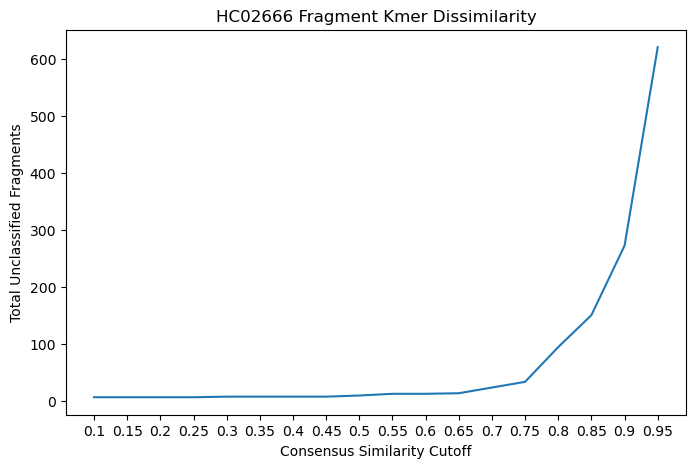

In [90]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 8,5
cutOffList = [[x,y] for x,y in CutoffDict.items()]
cutoffDF = pd.DataFrame(data=cutOffList, columns=['Similarity', 'Unknowns'])

sns.lineplot(data=cutoffDF, x='Similarity', y='Unknowns')

plt.title("HC02666 Fragment Kmer Dissimilarity")
plt.xlabel("Consensus Similarity Cutoff")
plt.ylabel("Total Unclassified Fragments")

#plt.savefig("/home/mark/Desktop/chromosome_y/Images/DYZ1/HaeIII_Fragments/HC02666_kmer_Fragments.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [297]:
#Compare Fragments to Fragments

myCons = {'Yqhet_3k1bp':[], 'DYZ18_Yq':[], 'DYZ1_Yq':[], 'Yqhet_2k7bp':[], 'Other':[]}

for x in myDict.keys():
    
    
    currentLeader = 0.75
    currentName = 'Other'
    
    for consensus in myDict[x].keys():
    
        if float(myDict[x][consensus]) > currentLeader:
            currentLeader = float(myDict[x][consensus])
            currentName = consensus
        else:
            continue
            
    myCons[currentName].append(x)


for cons in myCons.keys():
    
    fragmentList = [x for x in myCons[cons]]

    Run = 0
    while len(fragmentList) > 0:

        currentTarget = fragmentList.pop(0)

        myDict = {}
        for x in fragmentList:
            myDict[x]= 1-float(distance.braycurtis(list(abundanceKmer.loc[x]), list(abundanceKmer.loc[currentTarget])))

        tempList = []
        tempList.append(currentTarget)

        for x,y in myDict.items():
            if y > .75:
                tempList.append(x)
                fragmentList.remove(x)
            else:
                continue

        with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HC02666/myConBins/'+str(cons)+"_"+str(Run)+'.fasta', 'a+') as file:
            for row in tempList:
                if OrientationDict[row] == 'C':
                    file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HC02666.HIFIRW.ONTUL.na.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:"+str(row.split("HC02666:")[1])))
                else:
                    file.write(str(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HC02666.HIFIRW.ONTUL.na.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:"+str(row.split("HC02666:")[1]))).split("\n")[0]+'\n')
                    string = Seq(''.join(str(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HC02666.HIFIRW.ONTUL.na.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:"+str(row.split("HC02666:")[1]))).split("\n")[1:]))
                    file.write(str(string.reverse_complement())+'\n')
        file.close()

        Run+=1
    

In [298]:
rb_df['Identity'] = 'temp'
for row in rb_df.index:
    rb_df.at[row,'Identity'] = 'HC02666:'+str(rb_df.at[row,'Start'])+"-"+str(rb_df.at[row,'End'])
rb_df.set_index("Identity", inplace=True)
rb_df

,SpacerBlock,Length,Start,End,Orientation,Color
Identity,,,,,,
HC02666:28352768-28364453,0,11686,28352768,28364453,C,red
HC02666:28364454-28468102,0,103649,28364454,28468102,C,red
HC02666:28468103-28473529,0,5427,28468103,28473529,C,red
HC02666:28473530-28483973,0,10444,28473530,28483973,C,red
HC02666:28483974-28487109,0,3136,28483974,28487109,C,red
...,...,...,...,...,...,...
HC02666:54304796-54308277,22,3482,54304796,54308277,C,red
HC02666:54308278-54311776,22,3499,54308278,54311776,C,red
HC02666:54311777-54315319,22,3543,54311777,54315319,C,red


In [299]:
rb_df['Color'] = 'temp'
for (dirpath, dirnames, filenames) in walk("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HC02666/myConBins/"):
    for name in filenames:
        print(name)
        
        file1 = open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HC02666/myConBins/'+name, 'r')
        Lines = file1.readlines()

        for line in tqdm(Lines): 
            if '>' in line:
                if 'Other' in name:
                    rb_df.at[str(line.split("0000749.")[1].strip()), 'Color'] = 'lime'
                elif 'DYZ1_Yq' in name:
                    rb_df.at[str(line.split("0000749.")[1].strip()), 'Color'] = 'black'
                    
                elif 'DYZ18_Yq' in name:
                    rb_df.at[str(line.split("0000749.")[1].strip()), 'Color'] = 'grey'
                    
                elif 'Yqhet_2k7bp' in name:
                    rb_df.at[str(line.split("0000749.")[1].strip()), 'Color'] = 'cyan'
                    
                elif 'Yqhet_3k1bp' in name:
                    rb_df.at[str(line.split("0000749.")[1].strip()), 'Color'] = 'red'
                    
                else:
                    print("IDK")
    
            else:
                continue

Other_4.fasta


100%|████████████████████████████████████████| 37/37 [00:00<00:00, 61218.64it/s]


Other_2.fasta


100%|███████████████████████████████████████| 56/56 [00:00<00:00, 149796.57it/s]


Other_0.fasta


100%|██████████████████████████████████████████| 4/4 [00:00<00:00, 37957.50it/s]


Other_9.fasta


100%|████████████████████████████████████████| 11/11 [00:00<00:00, 95325.09it/s]


Other_1.fasta


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 26886.56it/s]


Other_8.fasta


100%|██████████████████████████████████████████| 4/4 [00:00<00:00, 46091.25it/s]


Other_3.fasta


100%|█████████████████████████████████████| 158/158 [00:00<00:00, 442094.75it/s]


Yqhet_3k1bp_0.fasta


100%|███████████████████████████████████| 2938/2938 [00:00<00:00, 605456.94it/s]


DYZ18_Yq_0.fasta


100%|███████████████████████████████████| 2193/2193 [00:00<00:00, 598718.26it/s]


Other_6.fasta


100%|███████████████████████████████████████| 39/39 [00:00<00:00, 218979.73it/s]


Yqhet_2k7bp_0.fasta


100%|███████████████████████████████████| 2863/2863 [00:00<00:00, 614486.36it/s]


Other_10.fasta


100%|██████████████████████████████████████████| 4/4 [00:00<00:00, 15947.92it/s]


DYZ1_Yq_0.fasta


100%|██████████████████████████████| 267302/267302 [00:00<00:00, 1249247.43it/s]


Other_7.fasta


100%|██████████████████████████████████████████| 4/4 [00:00<00:00, 32513.98it/s]


DYZ1_Yq_1.fasta


100%|███████████████████████████████████████| 11/11 [00:00<00:00, 159094.29it/s]


Other_5.fasta


100%|██████████████████████████████████████████| 8/8 [00:00<00:00, 75573.05it/s]


Other_4.fasta


100%|███████████████████████████████████████| 37/37 [00:00<00:00, 353506.26it/s]


Other_2.fasta


100%|███████████████████████████████████████| 56/56 [00:00<00:00, 297694.58it/s]


Other_0.fasta


100%|██████████████████████████████████████████| 4/4 [00:00<00:00, 58457.20it/s]


Other_9.fasta


100%|███████████████████████████████████████| 11/11 [00:00<00:00, 127100.12it/s]

DYZ1_Yq_2.fasta


FileNotFoundError: [Errno 2] No such file or directory: '/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HC02666/myConBins/DYZ1_Yq_2.fasta'

In [300]:
rb_df

,SpacerBlock,Length,Start,End,Orientation,Color
Identity,,,,,,
HC02666:28352768-28364453,0,11686,28352768,28364453,C,grey
HC02666:28364454-28468102,0,103649,28364454,28468102,C,grey
HC02666:28468103-28473529,0,5427,28468103,28473529,C,grey
HC02666:28473530-28483973,0,10444,28473530,28483973,C,grey
HC02666:28483974-28487109,0,3136,28483974,28487109,C,red
...,...,...,...,...,...,...
HC02666:54304796-54308277,22,3482,54304796,54308277,C,black
HC02666:54308278-54311776,22,3499,54308278,54311776,C,black
HC02666:54311777-54315319,22,3543,54311777,54315319,C,black


In [311]:
for color in set(rb_df['Color']):
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Con_Seqs/'+str(color)+".fasta", 'a+') as file:
        for row in rb_df[rb_df['Color']==color].index:
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HC02666.HIFIRW.ONTUL.na.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749."+str(row)))
    file.close()
        

In [340]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Con_Seqs/black.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Con_Seqs/DYZ1.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                file2.write(">"+str(line.split("0000749.")[1]))
            else:
                file2.write(line)
    file2.close()
file.close()

100%|██████████████████████████████| 284682/284682 [00:00<00:00, 1020984.89it/s]


In [339]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Con_Seqs/grey.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Con_Seqs/DYZ18.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                file2.write(">"+str(line.split("0000749.")[1]))
            else:
                file2.write(line)
    file2.close()
file.close()

100%|███████████████████████████████████| 2193/2193 [00:00<00:00, 498353.40it/s]


In [338]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Con_Seqs/cyan.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Con_Seqs/2kbp.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                file2.write(">"+str(line.split("0000749.")[1]))
            else:
                file2.write(line)
    file2.close()
file.close()

100%|███████████████████████████████████| 2863/2863 [00:00<00:00, 598469.59it/s]


In [337]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Con_Seqs/red.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Con_Seqs/3kbp.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                file2.write(">"+str(line.split("0000749.")[1]))
            else:
                file2.write(line)
    file2.close()
file.close()

100%|███████████████████████████████████| 2938/2938 [00:00<00:00, 512598.38it/s]


In [11]:
#tempDF.to_csv("/home/mark/Desktop/chromosome_y/Dataframes/HC02666/BlockSize_dataframe.csv")

In [319]:
#rb_df.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/DYZ1_dataframe.csv")

In [156]:
rb_df = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/DYZ1_dataframe.csv").set_index("Identity")
rb_df

,SpacerBlock,Length,Start,End,Orientation,Color
Identity,,,,,,
HC02666:28352768-28364453,0,11686,28352768,28364453,C,grey
HC02666:28364454-28468102,0,103649,28364454,28468102,C,grey
HC02666:28468103-28473529,0,5427,28468103,28473529,C,grey
HC02666:28473530-28483973,0,10444,28473530,28483973,C,grey
HC02666:28483974-28487109,0,3136,28483974,28487109,C,red
...,...,...,...,...,...,...
HC02666:54304796-54308277,22,3482,54304796,54308277,C,black
HC02666:54308278-54311776,22,3499,54308278,54311776,C,black
HC02666:54311777-54315319,22,3543,54311777,54315319,C,black


In [117]:
blockDefine = {x:{'Start':0, 'End':0} for x in set(rb_df['SpacerBlock'])}
for block in blockDefine.keys():
    blockDefine[block]['Start'] = int(rb_df[rb_df['SpacerBlock']==block].index[0].split("-")[0].split(":")[1])
    blockDefine[block]['End'] = int(rb_df[rb_df['SpacerBlock']==block].index[-1].split("-")[1])
blockDefine

{0: {'Start': 28352768, 'End': 30356992},
 1: {'Start': 30390718, 'End': 30914883},
 2: {'Start': 30954916, 'End': 31111660},
 3: {'Start': 31169274, 'End': 32374103},
 4: {'Start': 32723824, 'End': 33101658},
 5: {'Start': 33377382, 'End': 34110136},
 6: {'Start': 34383193, 'End': 34912796},
 7: {'Start': 35138022, 'End': 35893285},
 8: {'Start': 36339971, 'End': 37096206},
 9: {'Start': 37407522, 'End': 41007275},
 10: {'Start': 41767993, 'End': 42287355},
 11: {'Start': 42818265, 'End': 43472665},
 12: {'Start': 43863836, 'End': 44601716},
 13: {'Start': 45161408, 'End': 45823709},
 14: {'Start': 46379437, 'End': 46767163},
 15: {'Start': 47207864, 'End': 47532464},
 16: {'Start': 48004638, 'End': 48401760},
 17: {'Start': 49006977, 'End': 49480377},
 18: {'Start': 50167397, 'End': 50569693},
 19: {'Start': 52130781, 'End': 52750341},
 20: {'Start': 52911112, 'End': 53440952},
 21: {'Start': 53489178, 'End': 53936394},
 22: {'Start': 53959792, 'End': 54319004}}

In [87]:
goodColors = ['cyan', 'red', 'grey']
for block in set(rb_df['SpacerBlock']):
    if str(block) == '0':
        
        for color in set(rb_df['Color']):
            if color in goodColors:
                with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Con_Seqs/Color_Blocks/'+str(color)+"_block.fasta", 'a+') as file:
                    Start= str(list(rb_df[(rb_df['SpacerBlock']==block) & (rb_df['Color']==color)].index)[0].split("-")[0].split(":")[1])
                    if color == 'red':
                        End = str(28713020)
                    else:
                        End =str(list(rb_df[(rb_df['SpacerBlock']==block) & (rb_df['Color']==color)].index)[-1].split("-")[1])
                    file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HC02666.HIFIRW.ONTUL.na.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:"+Start+"-"+End))
                file.close()
                
            elif color == 'black':
                with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Con_Seqs/Color_Blocks/black_block.fasta', 'a+') as file:
                    Start= str(list(rb_df[(rb_df['SpacerBlock']==block) & (rb_df['Color']==color)].index)[0].split("-")[0].split(":")[1])
                    End =str(list(rb_df[(rb_df['SpacerBlock']==block)].index)[-1].split("-")[1])
                    file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HC02666.HIFIRW.ONTUL.na.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:"+Start+"-"+End))
                file.close()
                
            else:
                continue
    else:
        with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Con_Seqs/Color_Blocks/black_block.fasta', 'a+') as file:
            Start= str(list(rb_df[(rb_df['SpacerBlock']==block)].index)[0].split("-")[0].split(":")[1])
            End =str(list(rb_df[(rb_df['SpacerBlock']==block)].index)[-1].split("-")[1])
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HC02666.HIFIRW.ONTUL.na.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:"+Start+"-"+End))
        file.close()

In [88]:
for (dirpath, dirnames, filenames) in walk("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Con_Seqs/Color_Blocks/"):
    for name in filenames:
        print(name)
        
        if 'HMMER' in name or 'cleaned' in name:
            continue
        else:
        
            file1 = open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Con_Seqs/Color_Blocks/'+name, 'r')
            Lines = file1.readlines()

            with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Con_Seqs/Color_Blocks/'+name.split(".")[0]+'_cleaned.fasta', 'a+') as file2:
                for line in tqdm(Lines):
                    if ">" in line:
                        print(line)
                        file2.write(">"+str(line.split("0000749.")[1]))
                    else:
                        file2.write(line)
            file2.close()


            file1.close()


red_block.fasta


100%|███████████████████████████████████| 3819/3819 [00:00<00:00, 485145.44it/s]


>chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:28483974-28713020

grey_block.fasta


100%|███████████████████████████████████| 2188/2188 [00:00<00:00, 444521.05it/s]


>chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:28352768-28483973

black_block.fasta


 20%|██████▍                         | 55435/278124 [00:00<00:00, 554313.52it/s]

>chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:28823767-30356992

>chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:30390718-30914883

>chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:30954916-31111660

>chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:31169274-32374103

>chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:32723824-33101658

>chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:33377382-34110136

>chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:34383193-34912796

>chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:35138022-35893285

>chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:36339971-37096206

>chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:37407522-41007275



100%|███████████████████████████████| 278124/278124 [00:00<00:00, 922409.79it/s]


>chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:41767993-42287355

>chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:42818265-43472665

>chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:43863836-44601716

>chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:45161408-45823709

>chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:46379437-46767163

>chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:47207864-47532464

>chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:48004638-48401760

>chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:49006977-49480377

>chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:50167397-50569693

>chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:52130781-52750341

>chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:52911112-53440952

>chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:53489178-53936394

>chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:53959792-54319004

cyan_block.fasta


100%|███████████████████████████████████| 2760/2760 [00:00<00:00, 545870.66it/s]

>chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:28658241-28823766

runHMMER2.sh


In [4]:
#GoodDYZ = rb_df[(rb_df['Color']=='black') & (rb_df['Length']==3569)].copy()
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HC02666/DYZ1_majority.fasta', 'a+') as file:
#    for row in GoodDYZ.index:
#        if GoodDYZ.at[row,'Orientation'] == 'C':
#            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HC02666.HIFIRW.ONTUL.na.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:"+str(row.split("HC02666:")[1])))
#        else:
#            file.write(str(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HC02666.HIFIRW.ONTUL.na.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:"+str(row.split("HC02666:")[1]))).split("\n")[0]+'\n')
#            string = Seq(''.join(str(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HC02666.HIFIRW.ONTUL.na.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:"+str(row.split("HC02666:")[1]))).split("\n")[1:]))
#            file.write(str(string.reverse_complement())+'\n')
#file.close()

In [157]:
sizeDict = {'DYZ1_Yq': 3569, 'DYZ18_Yq': 2864, 'Yqhet_3k1bp':3120, 'Yqhet_2k7bp': 2767}

In [158]:
DYZ18Dict = {x:[] for x in set(rb_df[rb_df['Color']=='grey'].index)}
DYZ1Dict = {x:[] for x in set(rb_df[rb_df['Color']=='black'].index)}
k3bpDict = {x:[] for x in set(rb_df[rb_df['Color']=='red'].index)}
k2bpDict = {x:[] for x in set(rb_df[rb_df['Color']=='cyan'].index)}

In [159]:
DYZ18_tempList = []

#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Con_Seqs/HMMER/DYZ18_hmmer.tsv', 'r') as file:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Con_Seqs/Color_Blocks/HMMER/DYZ18_hmmer.tsv', 'r') as file:

    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            if info[8] == '-':
                DYZ18_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), '+', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                DYZ18_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), 'C', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

DYZ18_hmmer2 = pd.DataFrame(data=DYZ18_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
DYZ18_hmmer = DYZ18_hmmer2[DYZ18_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
DYZ18_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
14,HC02666:28352768-28483973,4,2864,2,2852,C,0.0,2465.2,2850
32,HC02666:28352768-28483973,2,2864,2854,5696,C,0.0,2445.9,2842
41,HC02666:28352768-28483973,2,2864,5698,8559,C,0.0,2423.0,2861
33,HC02666:28352768-28483973,2,2864,8561,11407,C,0.0,2439.1,2846
0,HC02666:28352768-28483973,2,2864,11409,14271,C,0.0,2513.8,2862
1,HC02666:28352768-28483973,2,2864,14273,17144,C,0.0,2508.4,2871
15,HC02666:28352768-28483973,2,2864,17146,20012,C,0.0,2464.9,2866
4,HC02666:28352768-28483973,2,2864,20014,22880,C,0.0,2480.0,2866
11,HC02666:28352768-28483973,2,2864,22882,25758,C,0.0,2466.8,2876
43,HC02666:28352768-28483973,2,2864,25760,28601,C,0.0,2361.8,2841


In [160]:
DYZ1_tempList = []

#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Con_Seqs/HMMER/DYZ1_mark2.tsv', 'r') as file:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Con_Seqs/Color_Blocks/HMMER/DYZ1_hmmer.tsv', 'r') as file:

    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            if info[8] == '-':
                DYZ1_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), 'C', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                DYZ1_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), '+', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

DYZ1_hmmer2 = pd.DataFrame(data=DYZ1_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
DYZ1_hmmer = DYZ1_hmmer2[DYZ1_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
DYZ1_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
3753,HC02666:28823767-30356992,1,3569,1,3533,C,0.0,3059.0,3532
4548,HC02666:52911112-53440952,500,3569,2,3052,+,0.0,2694.4,3050
4367,HC02666:30390718-30914883,1,3567,159,3733,+,0.0,2903.4,3574
4651,HC02666:31169274-32374103,1,2114,894,3007,C,0.0,1779.3,2113
4729,HC02666:52130781-52750341,385,2116,898,2539,C,0.0,1339.7,1641
...,...,...,...,...,...,...,...,...,...
2424,HC02666:37407522-41007275,1,3569,3582454,3586016,C,0.0,3102.6,3562
2230,HC02666:37407522-41007275,1,3569,3586017,3589565,C,0.0,3107.0,3548
1448,HC02666:37407522-41007275,1,3569,3589566,3593138,C,0.0,3121.7,3572
1883,HC02666:37407522-41007275,1,3569,3593139,3596686,C,0.0,3114.0,3547


In [161]:
k3_tempList = []

#Fragments HMMER
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Con_Seqs/HMMER/Yq_3kbp_hmmer_extra.tsv', 'r') as file:
#Block HMMER
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Con_Seqs/Color_Blocks/HMMER/Yq_3kbp_hmmer.tsv', 'r') as file:

    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            if info[8] == '-':
                k3_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), '+', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                k3_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), 'C', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

k3_hmmer2 = pd.DataFrame(data=k3_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
k3_hmmer = k3_hmmer2[k3_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
k3_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
58,HC02666:28483974-28713020,611,3119,1731,4223,C,0.0,2226.6,2492
7,HC02666:28483974-28713020,2,3119,4223,7364,C,0.0,2762.5,3141
15,HC02666:28483974-28713020,2,3119,7364,10485,C,0.0,2749.4,3121
13,HC02666:28483974-28713020,2,3119,10485,13616,C,0.0,2750.1,3131
0,HC02666:28483974-28713020,2,3119,13616,16737,C,0.0,2778.8,3121
...,...,...,...,...,...,...,...,...,...
65,HC02666:28483974-28713020,2,2197,213137,215323,C,0.0,1714.3,2186
68,HC02666:28483974-28713020,2,2197,216321,218508,C,0.0,1234.4,2187
64,HC02666:28483974-28713020,2,2196,219500,221695,C,0.0,1733.6,2195
72,HC02666:28483974-28713020,2,1940,222690,224597,C,0.0,1065.6,1907


In [162]:
k2_tempList = []

#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Con_Seqs/HMMER/Yq_2k7bp_hmmer.tsv', 'r') as file:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Con_Seqs/Color_Blocks/HMMER/Yq_2k7bp_hmmer.tsv', 'r') as file:
    
    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            #Normally antisense
            if info[8] == '-':
                k2_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), '+', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                k2_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), 'C', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

k2_hmmer2 = pd.DataFrame(data=k2_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
k2_hmmer = k2_hmmer2[k2_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
k2_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
40,HC02666:28658241-28823766,2,1312,54779,56079,C,0.0,1042.4,1300
39,HC02666:28658241-28823766,1271,2766,56068,57568,C,0.0,1314.5,1500
25,HC02666:28658241-28823766,2,2766,57568,60317,C,0.0,2479.4,2749
21,HC02666:28658241-28823766,2,2766,60317,63071,C,0.0,2486.5,2754
22,HC02666:28658241-28823766,2,2766,63071,65830,C,0.0,2486.0,2759
23,HC02666:28658241-28823766,2,2766,65830,68584,C,0.0,2484.1,2754
14,HC02666:28658241-28823766,2,2766,68584,71348,C,0.0,2497.8,2764
0,HC02666:28658241-28823766,2,2766,71348,74112,C,0.0,2519.9,2764
11,HC02666:28658241-28823766,2,2766,74112,76861,C,0.0,2499.3,2749
1,HC02666:28658241-28823766,2,2766,76861,79615,C,0.0,2509.1,2754


In [163]:
DYZ18_hmmer['Start']=0
DYZ1_hmmer['Start']=0
k3_hmmer['Start']=0
k2_hmmer['Start']=0

DYZ18_hmmer['End']=0
DYZ1_hmmer['End']=0
k3_hmmer['End']=0
k2_hmmer['End']=0

DYZ18_hmmer['Color']='grey'
DYZ1_hmmer['Color']='black'
k3_hmmer['Color']='red'
k2_hmmer['Color']='cyan'

DYZ18_hmmer['SpacerBlock']=0
DYZ1_hmmer['SpacerBlock']=0
k3_hmmer['SpacerBlock']=0
k2_hmmer['SpacerBlock']=0

In [164]:
for row in DYZ18_hmmer.index:
    DYZ18_hmmer.at[row,'Start'] = int(DYZ18_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ18_hmmer.at[row,'fstart'])
    DYZ18_hmmer.at[row,'End'] = int(DYZ18_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ18_hmmer.at[row,'fend'])
for row in DYZ1_hmmer.index:
    DYZ1_hmmer.at[row,'Start'] = int(DYZ1_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ1_hmmer.at[row,'fstart'])
    DYZ1_hmmer.at[row,'End'] = int(DYZ1_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ1_hmmer.at[row,'fend'])
for row in k3_hmmer.index:
    k3_hmmer.at[row,'Start'] = int(k3_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k3_hmmer.at[row,'fstart'])
    k3_hmmer.at[row,'End'] = int(k3_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k3_hmmer.at[row,'fend'])
for row in k2_hmmer.index:
    k2_hmmer.at[row,'Start'] = int(k2_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k2_hmmer.at[row,'fstart'])
    k2_hmmer.at[row,'End'] = int(k2_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k2_hmmer.at[row,'fend'])

In [165]:
LimeDF = rb_df[rb_df['Color']=="lime"].reset_index().rename(columns={'Identity':'Fragment'}).copy()

In [166]:
concattd = [DYZ18_hmmer, k3_hmmer,k2_hmmer,DYZ1_hmmer ]
newDF = pd.concat(concattd).drop(columns=['qstart', 'qend','fstart','fend','evalue','score'])
newDF.rename(columns={'orientation':"Orientation"}, inplace=True)
finalList = [newDF, LimeDF]
finalDF2 = pd.concat(finalList)
finalDF = finalDF2[finalDF2['Color']!='lime'].copy()
finalDF.sort_values(by='Start', ascending=True, inplace=True)

In [167]:
finalDF.reset_index(inplace=True)

In [168]:
for row in finalDF.index:
    for block in blockDefine.keys():
        if int(finalDF.at[row,'Start']) >= int(blockDefine[block]['Start']) and int(finalDF.at[row,'End']) <= int(blockDefine[block]['End']):
            finalDF.at[row,'SpacerBlock']= block
        else:
            continue

In [169]:
finalDF

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
0,14,HC02666:28352768-28483973,C,2850,28352770,28355620,grey,0
1,32,HC02666:28352768-28483973,C,2842,28355622,28358464,grey,0
2,41,HC02666:28352768-28483973,C,2861,28358466,28361327,grey,0
3,33,HC02666:28352768-28483973,C,2846,28361329,28364175,grey,0
4,0,HC02666:28352768-28483973,C,2862,28364177,28367039,grey,0
...,...,...,...,...,...,...,...,...
4926,4377,HC02666:53959792-54319004,C,3502,54301294,54304796,black,22
4927,4447,HC02666:53959792-54319004,C,3481,54304797,54308278,black,22
4928,4370,HC02666:53959792-54319004,C,3498,54308279,54311777,black,22
4929,4366,HC02666:53959792-54319004,C,3542,54311778,54315320,black,22


In [132]:
#for row in finalDF.index:
#    if str(finalDF.at[row,'Fragment']).strip() in list(rb_df.index):
#        finalDF.at[row,'SpacerBlock'] = rb_df.at[str(finalDF.at[row,'Fragment']),'SpacerBlock']
#    else:
#        continue
#finalDF

In [81]:
finalDF[finalDF['SpacerBlock']==0].iloc[[104]]

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
121,40,HC02666:28658241-28823766,C,1300,28713020,28714320,cyan,0


In [82]:
finalDF[finalDF['SpacerBlock']==0].iloc[[121]]

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
122,39,HC02666:28658241-28823766,C,1500,28714309,28715809,cyan,0


In [ ]:
28713020

In [170]:
lapList = []
overlaps = []
for spacerblock in set(finalDF['SpacerBlock']):
    tempDF = finalDF[finalDF['SpacerBlock']==spacerblock].copy()
    i=0
    while i < len(tempDF.index):
        try:
            lapList.append(int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']))
            if int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']) < 0 or int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']) > 40000:
                print(spacerblock)
                print(int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']))
                print(i)
                overlaps.append(int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']))
                print('\n')
            i+=1
        except:
            i+=1
            continue
#lapList

0
-12
73


0
-5
88


0
-11
119


0
-14
206


0
-10
207


0
-14
335


0
-10
336


1
-13
43


1
-16
44


1
-19
48


1
-23
49


1
-19
50


1
-16
51


1
-20
52


1
-22
53


1
-15
54


1
-20
55


1
-14
56


1
-11
76


1
-17
105


3
-19
144


3
-14
152


3
-8
262


3
-25
313


3
-7
326


3
-25
328


4
-25
0


4
-18
39


4
-8
83


4
-24
85


4
-8
87


4
-25
89


4
-25
93


5
-32
0


5
-14
7


5
-8
41


5
-8
44


6
-18
0


6
-1
49


6
-17
58


6
-25
67


6
-25
74


6
-25
76


6
-25
123


6
-25
134


7
-18
0


7
-14
188


7
-14
209


8
-17
0


8
-17
27


8
-21
76


8
-26
164


8
-26
166


8
-26
170


8
-25
172


8
-26
174


8
-25
182


9
-19
0


9
-18
509


11
-18
0


11
-9
94


11
-10
97


11
-9
100


12
-26
0


12
-18
72


12
-16
127


12
-16
130


12
-19
157


12
-19
161


13
-25
0


13
-23
67


13
-18
77


13
-19
120


13
-16
123


13
-19
149


15
-30
0


15
-11
27


16
-30
0


16
-11
28


17
-17
0


17
-14
128


18
-18
0


18
-14
106


19
-26
0


19
-18
58


19
-18
62


20
-17
60


20
-7
1

In [171]:
print(len(overlaps))

92


(array([ 1.,  2.,  0.,  8., 13.,  3.,  1.,  3.,  8., 16.,  7., 10.,  2.,
         4.,  5.,  5.,  2.,  1.,  0.,  1.]),
 array([-32.  , -30.45, -28.9 , -27.35, -25.8 , -24.25, -22.7 , -21.15,
        -19.6 , -18.05, -16.5 , -14.95, -13.4 , -11.85, -10.3 ,  -8.75,
         -7.2 ,  -5.65,  -4.1 ,  -2.55,  -1.  ]),
 <BarContainer object of 20 artists>)

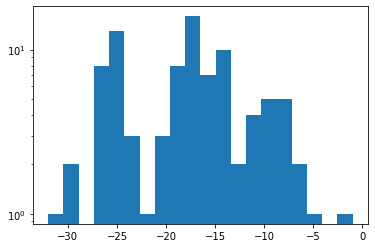

In [172]:
plt.hist(overlaps, log=True, bins=20)

3902
-32


(array([4.783e+03, 2.000e+01, 4.700e+01, 5.000e+00, 2.800e+01, 2.000e+01,
        2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ -32. ,  164.7,  361.4,  558.1,  754.8,  951.5, 1148.2, 1344.9,
        1541.6, 1738.3, 1935. , 2131.7, 2328.4, 2525.1, 2721.8, 2918.5,
        3115.2, 3311.9, 3508.6, 3705.3, 3902. ]),
 <BarContainer object of 20 artists>)

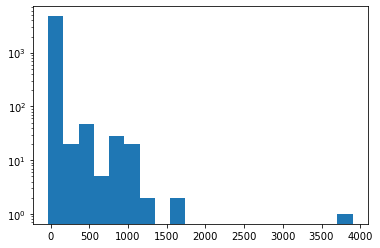

In [173]:
print(max(lapList))
print(min(lapList))

plt.hist(lapList, log=True, bins=20)

In [174]:
#rb_dfold = rb_df.copy()
rb_df = finalDF.copy()

# Export and update

In [175]:
rb_df[(rb_df['SpacerBlock']==0) & (rb_df['Color']=='black')]

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
160,3753,HC02666:28823767-30356992,C,3532,28823768,28827300,black,0
161,3902,HC02666:28823767-30356992,C,3543,28827301,28830844,black,0
162,2851,HC02666:28823767-30356992,C,3563,28830845,28834408,black,0
163,2134,HC02666:28823767-30356992,C,3568,28834409,28837977,black,0
164,3756,HC02666:28823767-30356992,C,3532,28837978,28841510,black,0
...,...,...,...,...,...,...,...,...
591,2941,HC02666:28823767-30356992,C,3543,30340565,30344108,black,0
592,4011,HC02666:28823767-30356992,C,3513,30344109,30347622,black,0
593,4043,HC02666:28823767-30356992,C,3533,30347623,30351156,black,0
594,3200,HC02666:28823767-30356992,C,3542,30351157,30354699,black,0


In [176]:
tempDF.at[0,'Start']=28823768
tempDF.at[0,'Length']= (30356991-28823768)
tempDF

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
4827,4706.0,HC02666:53959792-54319004,C,1846.0,53960700.0,53962546.0,black,22.0
4828,4656.0,HC02666:53959792-54319004,C,2417.0,53963054.0,53965471.0,black,22.0
4829,4489.0,HC02666:53959792-54319004,C,3548.0,53965472.0,53969020.0,black,22.0
4830,4510.0,HC02666:53959792-54319004,C,3518.0,53969022.0,53972540.0,black,22.0
4831,4511.0,HC02666:53959792-54319004,C,3517.0,53972542.0,53976059.0,black,22.0
...,...,...,...,...,...,...,...,...
4927,4447.0,HC02666:53959792-54319004,C,3481.0,54304797.0,54308278.0,black,22.0
4928,4370.0,HC02666:53959792-54319004,C,3498.0,54308279.0,54311777.0,black,22.0
4929,4366.0,HC02666:53959792-54319004,C,3542.0,54311778.0,54315320.0,black,22.0
4930,4394.0,HC02666:53959792-54319004,C,3533.0,54315321.0,54318854.0,black,22.0


In [185]:
#rb_df.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Finalized_Fragmentdf.csv")

In [124]:
#tempDF.to_csv("/home/mark/Desktop/chromosome_y/Dataframes/HC02666/BlockSize_dataframe.csv")

## Visualize

In [178]:
import turtle

In [180]:
turtle.position()
turtle.color('black')
turtle.speed(0)
flag=1
groupFlag = 0
#groupNames = list(goodAluGroupDict.keys())
lengthFlag = 0

startPosition = turtle.position()
turtle.color("white")
turtle.setposition(turtle.pos()[0], turtle.pos()[1]+300)
turtle.color("black")
turtle.write("HC02666 Yq Heterochromatin Spacer Blocks", align="Left")
turtle.color("white")
turtle.setposition(startPosition)

for key in tqdm(list(set(rb_df['SpacerBlock']))):
    
    totalAlus = len(rb_df[rb_df['SpacerBlock']==key])
        
    turtle.color("black")
    turtle.forward(75)
    currentPosition = turtle.position()
    

    if lengthFlag == 0:
        turtle.setposition(currentPosition)
    else:
        #turtle.setposition(turtle.pos()[0]-10, turtle.pos()[1]+20)
        #turtle.write(str(BlockListDistance[key]), align="right")
        turtle.setposition(currentPosition)

    currentPosition = turtle.position()
    if (flag % 2) == 0:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]-200)
    else:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]+200)
        
    turtle.write(" Spacer Block: "+str(key), align="left")

    turtle.setposition(currentPosition)
    

    groupFlag+=1
    lengthFlag+=1
    flag+=1
    
    tempDF = rb_df[rb_df['SpacerBlock']==key].copy() 
    for item in tempDF.index:
        
        if tempDF.at[item,'Orientation'] == 'C':
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.left(90)
            turtle.forward(1)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.right(90)
            turtle.forward(.5)
        
        elif tempDF.at[item,'Orientation'] == '+':
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.left(90)
            turtle.forward(.5)

        elif tempDF.at[item,'Orientation'] == 'temp':
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.left(90)
            turtle.forward(.5)
        
        else:
            turtle.color('black')
            turtle.forward(.5)


100%|███████████████████████████████████████████| 23/23 [09:19<00:00, 24.32s/it]


In [181]:
from PIL import Image

In [182]:
def save_as_png(canvas,fileName):
    # save postscipt image 
    canvas.postscript(file = fileName + '.eps') 
    # use PIL to convert to PNG 
    img = Image.open(fileName + '.eps') 
    img.save(fileName + '.png', 'png') 

In [183]:
ts = turtle.getscreen()
save_as_png(ts.getcanvas(),"/home/mark/Desktop/chromosome_y/Images/HC02666/HC02666_YqHeterochromatin_DYZ1_HMMER_final")

In [184]:
turtle.bye()

# Only Fragment vs Fragment

In [336]:
#Compare Fragments to Fragments
fragmentList = [x for x in kmerDF.index]
Run = 0
while len(fragmentList) > 0:
    
    currentTarget = fragmentList.pop(0)
    
    myDict = {}
    for x in fragmentList:
        myDict[x]= 1-float(distance.braycurtis(list(abundanceKmer.loc[x]), list(abundanceKmer.loc[currentTarget])))
    
    tempList = []
    tempList.append(currentTarget)
    
    for x,y in myDict.items():
        if y > .90:
            tempList.append(x)
            fragmentList.remove(x)
        else:
            continue

    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HC02666/myBins_conservative/myBin_'+str(Run)+'.fasta', 'a+') as file:
        for row in tempList:
            if OrientationDict[row] == 'C':
                file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HC02666.HIFIRW.ONTUL.na.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:"+str(row.split("HC02666:")[1])))
            else:
                #print(row)
                #print(Run)
                file.write(str(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HC02666.HIFIRW.ONTUL.na.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:"+str(row.split("HC02666:")[1]))).split("\n")[0]+'\n')
                string = Seq(''.join(str(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HC02666.HIFIRW.ONTUL.na.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:"+str(row.split("HC02666:")[1]))).split("\n")[1:]))
                file.write(str(string.reverse_complement())+'\n')
    file.close()
    
    Run+=1
    

HC02666:28569300-28569479
3
HC02666:28577993-28578172
3
HC02666:30390878-30399698
7
HC02666:30399699-30405720
7
HC02666:30405721-30409273
7
HC02666:30409274-30412832
7
HC02666:30412833-30416375
7
HC02666:30416376-30419889
7
HC02666:30419890-30423462
7
HC02666:30423463-30427020
7
HC02666:30427021-30430554
7
HC02666:30430555-30434107
7
HC02666:30434108-30441189
7
HC02666:30441190-30444723
7
HC02666:30444724-30448297
7
HC02666:30448298-30451845
7
HC02666:30451846-30455389
7
HC02666:30455390-30458963
7
HC02666:30458964-30462521
7
HC02666:30462522-30466078
7
HC02666:30466079-30469632
7
HC02666:30469633-30473210
7
HC02666:30473211-30476794
7
HC02666:30476795-30480343
7
HC02666:30480344-30483937
7
HC02666:30483938-30487506
7
HC02666:30487507-30491054
7
HC02666:30491055-30494638
7
HC02666:30494639-30498202
7
HC02666:30498203-30501755
7
HC02666:30501756-30512447
7
HC02666:30512448-30515996
7
HC02666:30515997-30519565
7
HC02666:30519566-30526703
7
HC02666:30526704-30531945
7
HC02666:30533847-305

In [95]:
CompFrags = myCons['Yqhet_3k1bp']+myCons['DYZ18_Yq']
CompFrags

['HC02666:28485068-28487109',
 'HC02666:28487110-28488218',
 'HC02666:28488219-28490245',
 'HC02666:28490246-28493366',
 'HC02666:28493367-28496497',
 'HC02666:28496498-28497611',
 'HC02666:28497612-28499618',
 'HC02666:28499619-28502754',
 'HC02666:28502755-28503868',
 'HC02666:28503869-28505875',
 'HC02666:28505876-28509006',
 'HC02666:28509007-28510120',
 'HC02666:28510121-28512146',
 'HC02666:28512147-28515267',
 'HC02666:28515268-28516381',
 'HC02666:28516382-28518398',
 'HC02666:28518399-28522627',
 'HC02666:28522628-28525738',
 'HC02666:28525739-28527745',
 'HC02666:28527746-28569299',
 'HC02666:28569480-28577992',
 'HC02666:28578173-28581093',
 'HC02666:28581094-28631383',
 'HC02666:28631384-28640676',
 'HC02666:28640677-28655148',
 'HC02666:28655149-28658240']

In [99]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def runPCA(dataframe, filename, title):
    pcaDF2 = dataframe.reset_index().drop("SampleName",axis=1).copy()
    pcaDF3 = pcaDF2.drop("Color", axis=1).copy()
    features = pcaDF3.columns
    x = pcaDF3.loc[:, features].values
    y = pcaDF2.loc[:,['Color']].values
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2']).copy()
    finalDf = pd.concat([principalDf, pcaDF2[['Color']]], axis = 1).copy()
    import seaborn as sns
    from matplotlib import rcParams
    palette ={'black':'black', 'red':'red', 'blue':'blue'}
    #palette ={'#648FFF':'#FFB000'}


    rcParams['figure.figsize'] = 11.7,8.27
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1 ('+str("%.2f" % (100*pca.explained_variance_ratio_[0]))+"% variance)", labelpad=15)
    ax.set_ylabel('Principal Component 2 ('+str("%.2f" % (100*pca.explained_variance_ratio_[1]))+"% variance)", labelpad=15)
    ax.set_title('Principal Component Analysis ('+title+')')

    #targets = ['#648FFF', '#FFB000']
    #colors = ['#648FFF', '#FFB000']
    
    targets = ['black','red','blue']
    colors = ['black','red','blue']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf ['Color'] == target
        ax.scatter(finalDf .loc[indicesToKeep, 'principal component 1']
                   , finalDf .loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 50)
        
    ax.legend(targets, loc='center left', bbox_to_anchor=(1.05, 0.85), borderaxespad=0, title='Original Coloring', prop={'size': 14}, facecolor='white')
    rcParams['figure.figsize'] = 11.7,8.27
    ax = sns.set(font_scale=1.3)
    
    plt.show()
    return (pd.DataFrame(pca.components_,columns=pcaDF3.columns,index = ['PC-1','PC-2']))


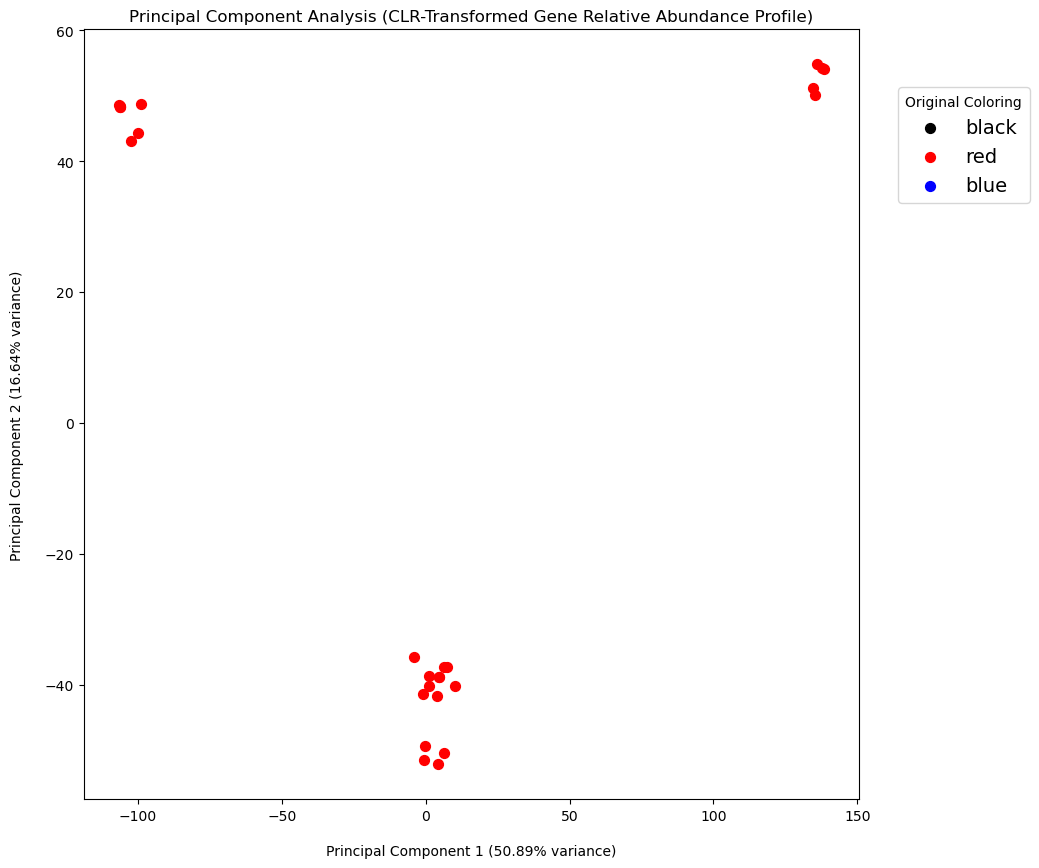

In [100]:
pcaComponents = runPCA(CLR_KMER.loc[CompFrags], 'superpopulation_PCA_full', 'CLR-Transformed Gene Relative Abundance Profile')

In [101]:
pcaComponents

,ATCCG,ATCCT,AAGTT,GCGCG,GCCGG,AACGT,ATGTC,ATGCA,CGATT,AGAGC,...,ATCGG,AGTTT,CATAA,TGTGT,TAATC,CGGGT,AATAT,CTCGC,AGGCC,GGCCT
PC-1,0.002067,0.002807,0.002159,0.002067,0.002067,0.002807,-0.063341,0.004570,0.003468,0.070742,...,0.070752,0.002807,0.005041,0.003643,0.002512,0.002159,0.002377,0.002067,0.002067,0.002067
PC-2,0.022611,0.013578,0.012094,0.022611,0.022611,0.013578,-0.047896,0.021828,-0.038745,-0.062277,...,-0.064085,0.013578,-0.068737,-0.011694,-0.001698,0.012094,0.026138,0.022611,0.022611,0.022611


In [103]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def runPCA3(dataframe, filename, title):
    pcaDF2 = dataframe.reset_index().drop("SampleName",axis=1).copy()
    pcaDF3 = pcaDF2.drop("Color", axis=1).copy()
    features = pcaDF3.columns
    x = pcaDF3.loc[:, features].values
    y = pcaDF2.loc[:,['Color']].values
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2']).copy()
    finalDf = pd.concat([principalDf, pcaDF2[['Color']]], axis = 1).copy()
    finalDf['Fragment'] = list(dataframe.index)
    
    return(finalDf)

In [104]:
runPCA3(CLR_KMER.loc[CompFrags], 'superpopulation_PCA_full', 'CLR-Transformed Gene Relative Abundance Profile')

,principal component 1,principal component 2,Color,Fragment
0,-100.101464,44.352910,red,HC02666:28485068-28487109
1,137.724251,54.285764,red,HC02666:28487110-28488218
2,-106.575315,48.569727,red,HC02666:28488219-28490245
3,-0.878044,-41.483676,red,HC02666:28490246-28493366
4,-3.915070,-35.832585,red,HC02666:28493367-28496497
5,134.439752,51.270899,red,HC02666:28496498-28497611
6,-106.123825,48.254872,red,HC02666:28497612-28499618
7,4.721766,-38.862939,red,HC02666:28499619-28502754
8,136.131103,54.804543,red,HC02666:28502755-28503868
9,-106.123825,48.254872,red,HC02666:28503869-28505875


In [106]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def pullFeatureImportance(dataframe):
    
    pcaDF2 = dataframe.reset_index().drop("Bacterial_Species",axis=1).copy()
    pcaDF3 = pcaDF2.drop(columns=["Cohort","Designation"], axis=1).copy()
    features = pcaDF3.columns
    x = pcaDF3.loc[:, features].values
    y = pcaDF2.loc[:,['Cohort','Designation']].values
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    
    principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2']).copy()
    finalDf = pd.concat([principalDf, pcaDF2[['Cohort','Designation']]], axis = 1).copy()
    
    return (pd.DataFrame(pca.components_,columns=pcaDF3.columns,index = ['PC-1','PC-2']))

In [107]:
tempcomp = runPCA3(CLR_KMER.loc[CompFrags], 'Degree_all_Nodes_Pfam', 'High Degree Centrality - Pfam')
tempcomp.sort_values(by='principal component 1', ascending=False)

,principal component 1,principal component 2,Color,Fragment
11,138.330934,54.158075,red,HC02666:28509007-28510120
1,137.724251,54.285764,red,HC02666:28487110-28488218
8,136.131103,54.804543,red,HC02666:28502755-28503868
14,135.423815,50.071542,red,HC02666:28515268-28516381
5,134.439752,51.270899,red,HC02666:28496498-28497611
19,10.093500,-40.258908,red,HC02666:28527746-28569299
25,7.558748,-37.386705,red,HC02666:28655149-28658240
21,6.500340,-37.304652,red,HC02666:28578173-28581093
22,6.349083,-50.424171,red,HC02666:28581094-28631383
7,4.721766,-38.862939,red,HC02666:28499619-28502754


In [108]:
pcaClusterDF = tempcomp.set_index("Fragment").drop(columns=['Color']).copy()

For n_clusters = 2 The average silhouette_score is : 0.7061601097647221
For n_clusters = 3 The average silhouette_score is : 0.9529640638987525
For n_clusters = 4 The average silhouette_score is : 0.7554000138232169
For n_clusters = 5 The average silhouette_score is : 0.7158774642240411
For n_clusters = 6 The average silhouette_score is : 0.6446652434187375
For n_clusters = 7 The average silhouette_score is : 0.6169041224010232


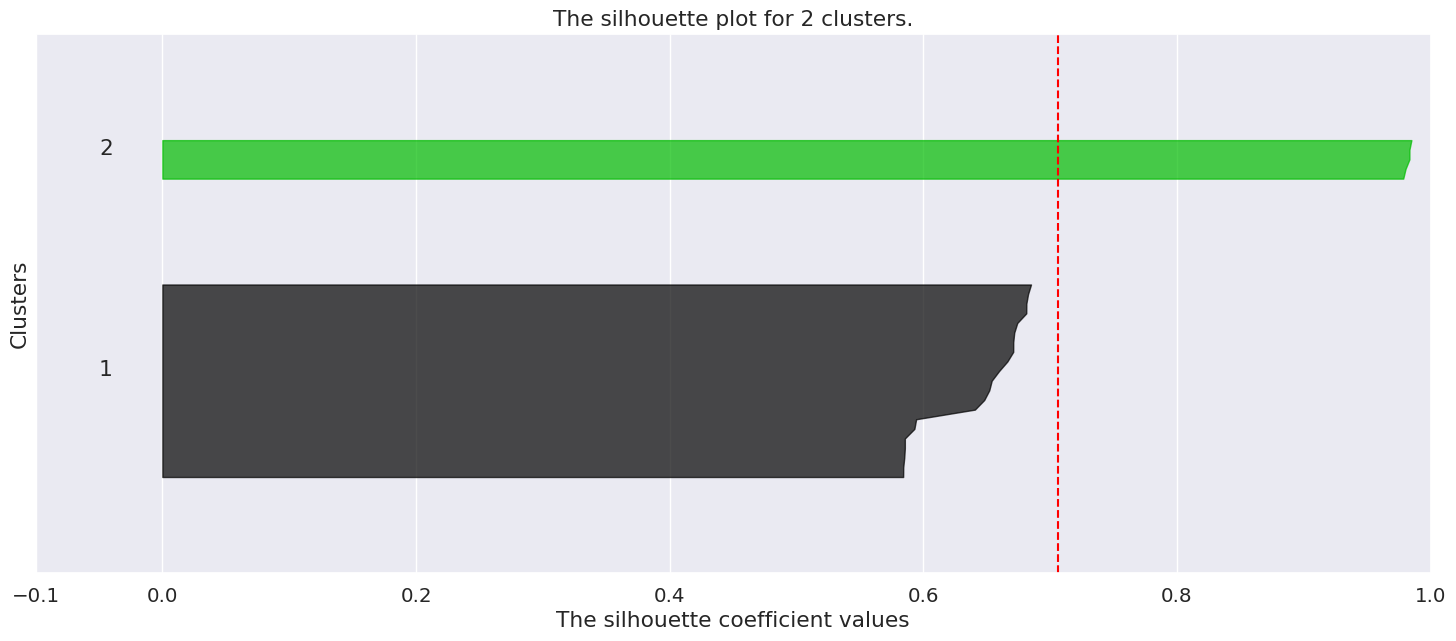

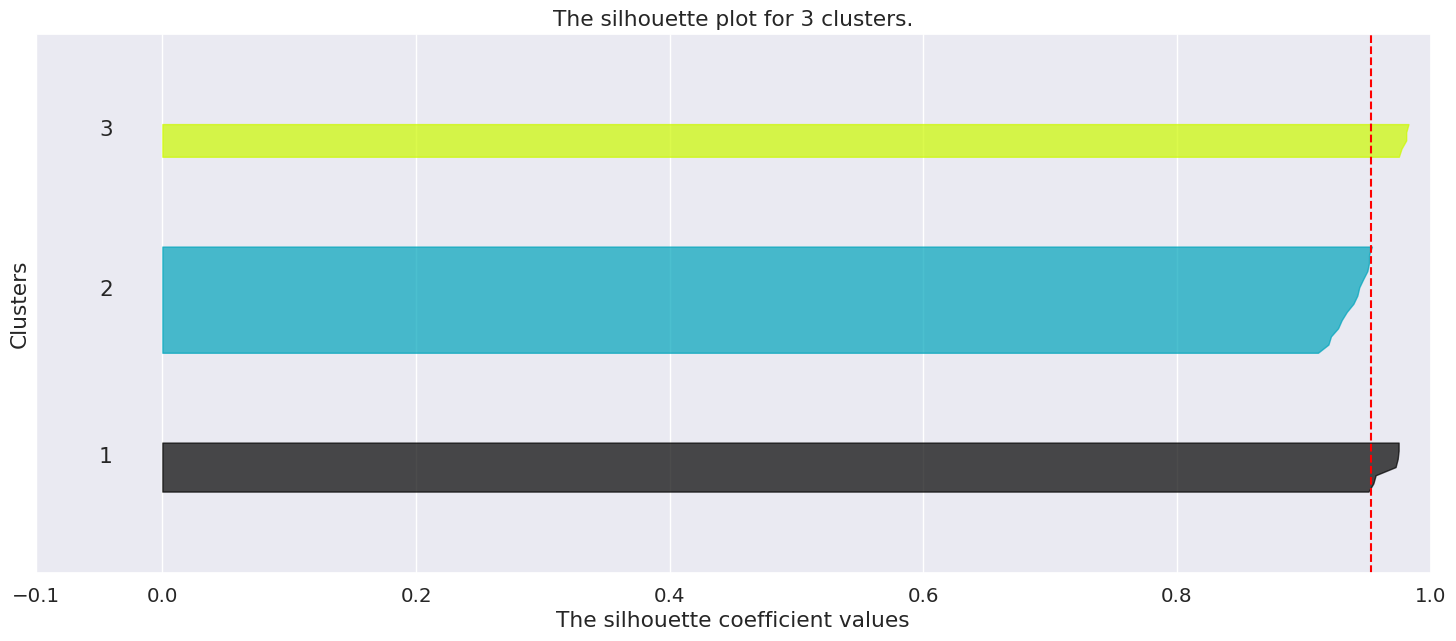

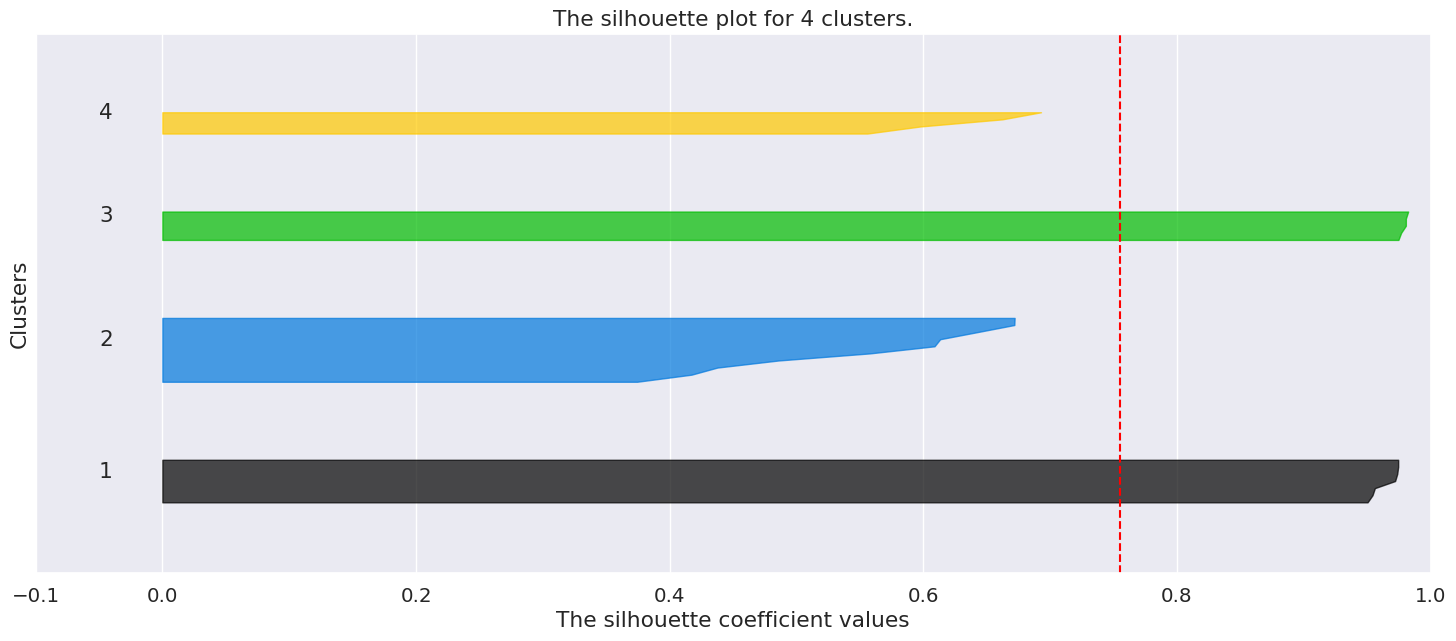

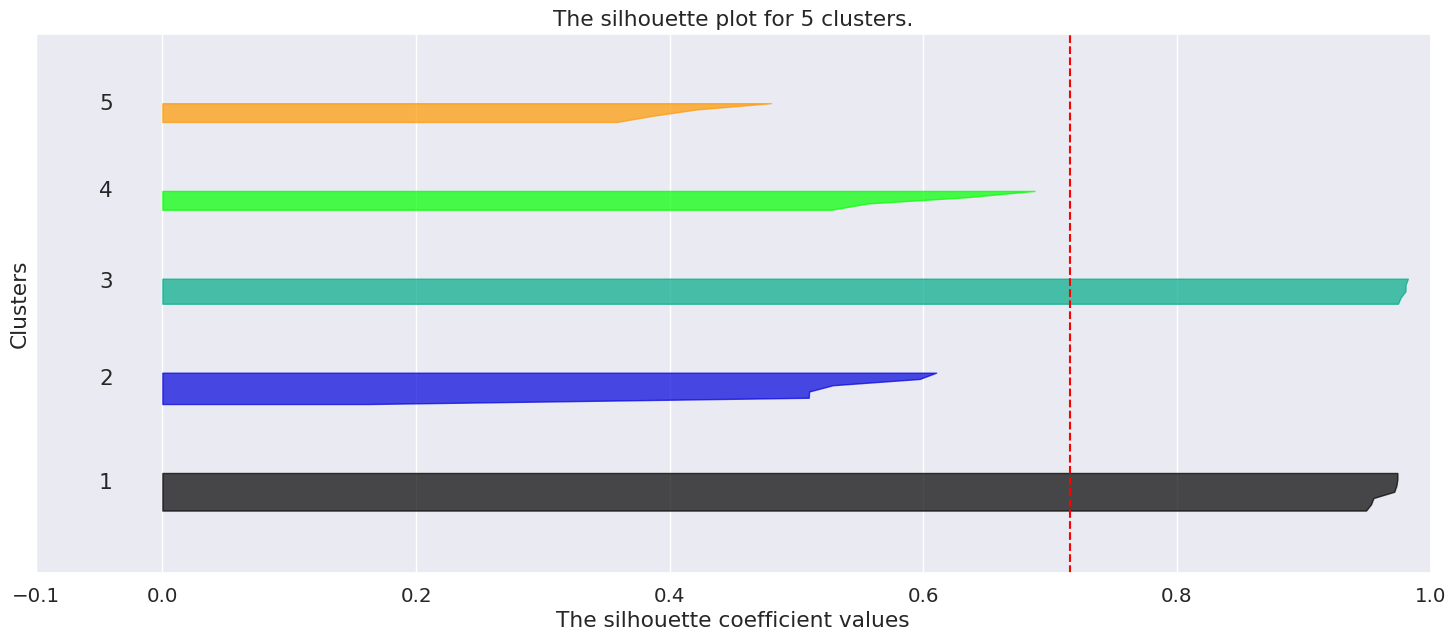

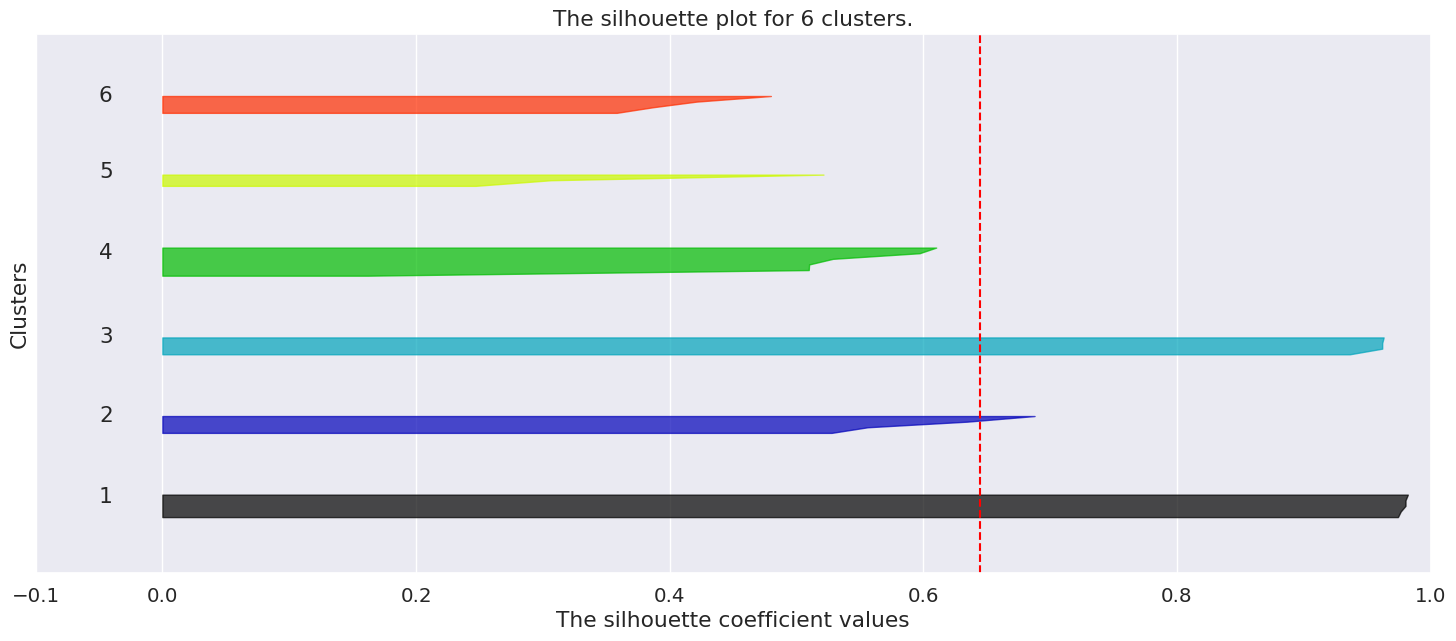

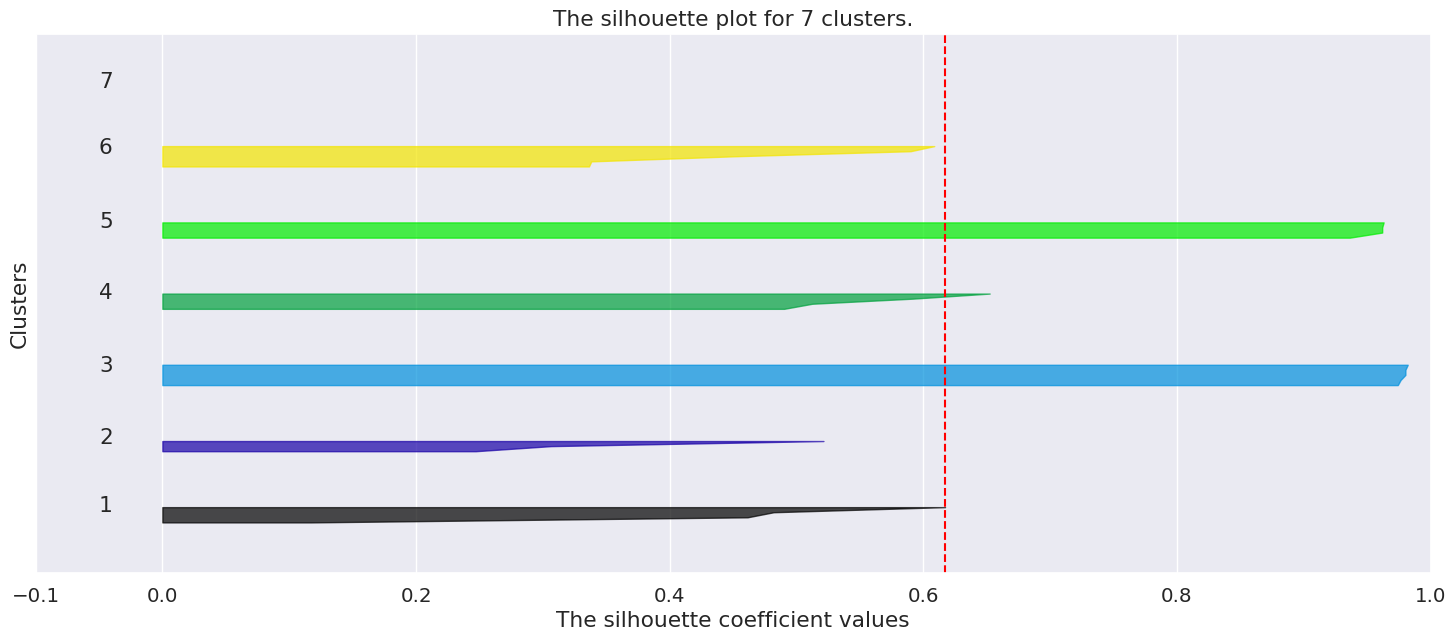

In [109]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6,7]

X = pcaClusterDF.copy()

KScores = {}
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    KScores[n_clusters]=silhouette_avg
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for "+str(i+1)+" clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Clusters")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    #plt.savefig("Silhouette_PCA_Modules_"+str(i)+".pdf", bbox_inches='tight', dpi=300)

plt.show()

([<matplotlib.axis.XTick at 0x7f736c15b520>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

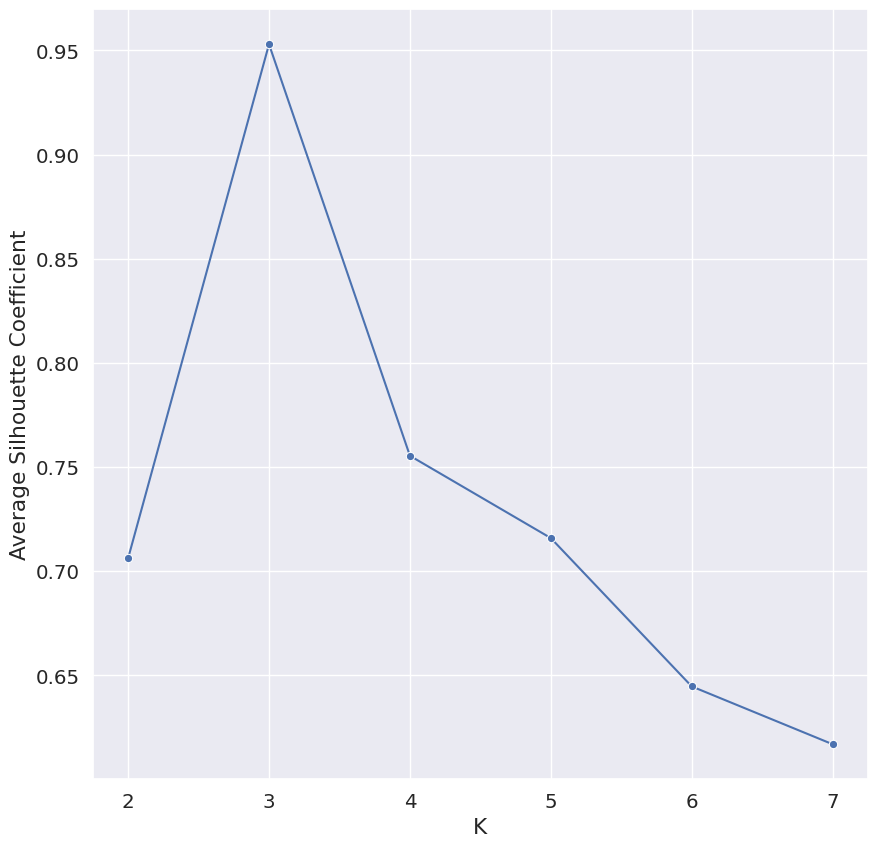

In [110]:
plt.subplots(figsize=(10,10))
kDF = pd.DataFrame(columns=['K','Average Silhouette Coefficient'])
kDF['K'] = KScores.keys()
kDF['Average Silhouette Coefficient'] = KScores.values()
sns.lineplot(data=kDF, x="K", y="Average Silhouette Coefficient", marker='o')
plt.xticks(np.arange(min(list(kDF['K'])), max(list(kDF['K']))+1, 1.0))
#plt.savefig("Silhouette_K_LineGraph.pdf", bbox_inches='tight', dpi=300)

In [111]:
#Give random state so reproducible
clustering = KMeans(n_clusters=3, random_state=8).fit(pcaClusterDF)

pcaClusterDF['Km'] = clustering.labels_
pcaClusterDF['Clusters'] = 'temp'

for i in pcaClusterDF.index:
    pcaClusterDF.at[i,'Clusters'] = str("Cluster: ")+str(pcaClusterDF.at[i,'Km']+1)


In [112]:
pcaClusterDF2 = pcaClusterDF.drop(columns=['Km']).copy()
pcaClusterDF2['Cluster'] = 'temp'
for i in pcaClusterDF.index:
    if pcaClusterDF.at[i,'Clusters'] == 'Cluster: 1':
        pcaClusterDF2.at[i,'Cluster'] = 'Cluster: 0'
    elif pcaClusterDF.at[i,'Clusters'] == 'Cluster: 2':
        pcaClusterDF2.at[i,'Cluster'] = 'Cluster: 1'
    elif pcaClusterDF.at[i,'Clusters'] == 'Cluster: 3':
        pcaClusterDF2.at[i,'Cluster'] = 'Cluster: 2'
    elif pcaClusterDF.at[i,'Clusters'] == 'Cluster: 4':
        pcaClusterDF2.at[i,'Cluster'] = 'Cluster: 3'
    elif pcaClusterDF.at[i,'Clusters'] == 'Cluster: 5':
        pcaClusterDF2.at[i,'Cluster'] = 'Cluster: 4'
    elif pcaClusterDF.at[i,'Clusters'] == 'Cluster: 6':
        pcaClusterDF2.at[i,'Cluster'] = 'Cluster: 5'
    else:
        continue
pcaClusterDF2.drop(columns=['Clusters'], inplace=True)
pcaClusterDF2.rename(columns={'Cluster':'Clusters'},inplace=True)
pcaClusterDF2

,principal component 1,principal component 2,Clusters
Fragment,,,
HC02666:28485068-28487109,-100.101464,44.352910,Cluster: 1
HC02666:28487110-28488218,137.724251,54.285764,Cluster: 2
HC02666:28488219-28490245,-106.575315,48.569727,Cluster: 1
HC02666:28490246-28493366,-0.878044,-41.483676,Cluster: 0
HC02666:28493367-28496497,-3.915070,-35.832585,Cluster: 0
HC02666:28496498-28497611,134.439752,51.270899,Cluster: 2
HC02666:28497612-28499618,-106.123825,48.254872,Cluster: 1
HC02666:28499619-28502754,4.721766,-38.862939,Cluster: 0
HC02666:28502755-28503868,136.131103,54.804543,Cluster: 2


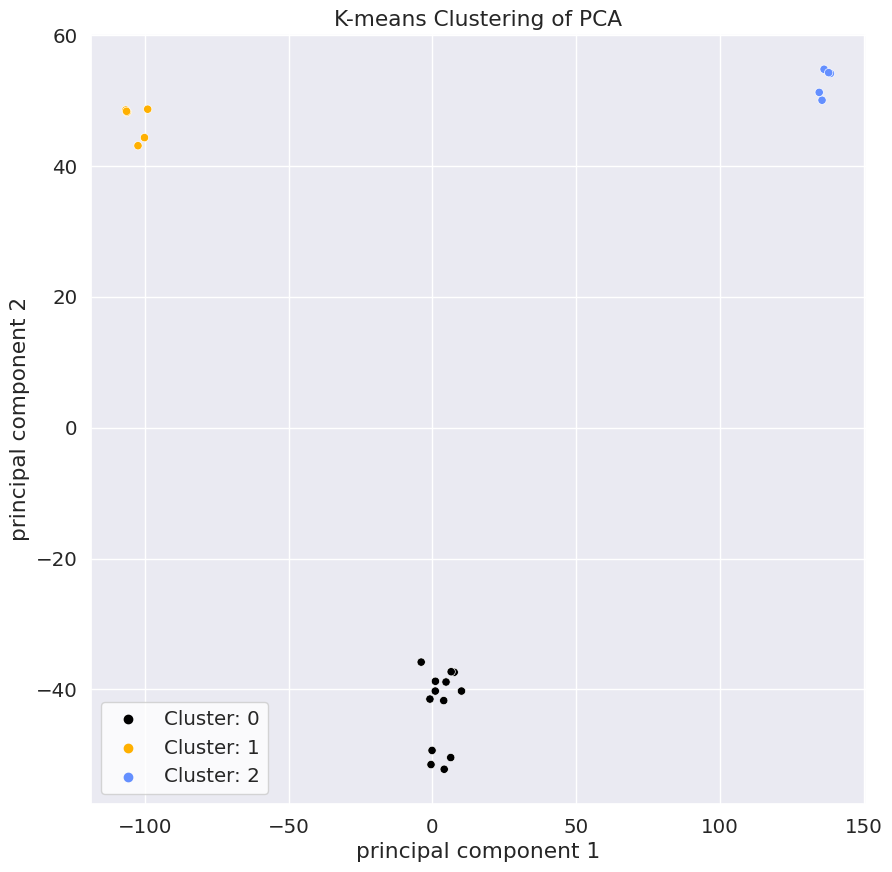

In [113]:
plt.figure(figsize = (10,10))
ClusterColorlegend = {"Cluster: 1":"#FFB000","Cluster: 2":"#648FFF","Cluster: 3":"#1ac938","Cluster: 4":"#8b2be2","Cluster: 5":"#e8000b", 'Cluster: 0':'black'}
#ClusterColorlegend = {"Cluster: 1":"#FFB000","Cluster: 2":"#648FFF","Cluster: 3":"#1ac938","Cluster: 4":"#8b2be2","Cluster: 5":"#e8000b", 'Cluster: 0':'red'}

sns.scatterplot(palette=ClusterColorlegend, data=pcaClusterDF2.sort_values(by=['Clusters']), x="principal component 1", y="principal component 2", hue="Clusters")
plt.title('K-means Clustering of PCA')
#plt.xlabel('Principal Component 1 (25.12% Variance)')
#plt.ylabel('Principal Component 2 (13.43% Variance) ')
plt.legend(facecolor='white')
#plt.savefig("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HC02666/KMEANS_DYZ1Blocks.pdf", bbox_inches='tight', dpi=300)
plt.show()



In [116]:
rb_df2 = rb_df.copy()

In [117]:
for row in rb_df2.index:
    if 'HC02666:'+str(rb_df2.at[row,'Start'])+"-"+str(rb_df2.at[row,'End']) in list(pcaClusterDF2.index):
        rb_df2.at[row, 'Color'] = ClusterColorlegend[pcaClusterDF2.at['HC02666:'+str(rb_df.at[row,'Start'])+"-"+str(rb_df.at[row,'End']),'Clusters']]
    else:
        rb_df2.at[row, 'Color'] = 'red'
        #continue

In [129]:
rb_df

SpacerBlock  Length     Start       End Orientation Color
SpacerBlock                                                                
0           436             0    2042  28485068  28487109           C   red
            471             0    1109  28487110  28488218           C   red
            437             0    2027  28488219  28490245           C   red
            426             0    3121  28490246  28493366           C   red
            424             0    3131  28493367  28496497           C   red
...                       ...     ...       ...       ...         ...   ...
22          4720           22    3482  54304796  54308277           C   red
            4712           22    3499  54308278  54311776           C   red
            4683           22    3543  54311777  54315319           C   red
            4684           22    3534  54315320  54318853           C   red
            4753           22     151  54318854  54319004           C   red

[4754 rows x 6 columns]

In [119]:
transDF = rb_df2[rb_df2['Color']!='red'].copy()

In [131]:
transDF.sort_values(by='Start', ascending=True)

SpacerBlock  Length     Start       End Orientation    Color
SpacerBlock                                                                  
0           436            0    2042  28485068  28487109           C  #FFB000
            471            0    1109  28487110  28488218           C  #648FFF
            437            0    2027  28488219  28490245           C  #FFB000
            426            0    3121  28490246  28493366           C    black
            424            0    3131  28493367  28496497           C    black
            467            0    1114  28496498  28497611           C  #648FFF
            440            0    2007  28497612  28499618           C  #FFB000
            423            0    3136  28499619  28502754           C    black
            468            0    1114  28502755  28503868           C  #648FFF
            441            0    2007  28503869  28505875           C  #FFB000
            425            0    3131  28505876  28509006           C    black
            469            0    1114  28509007  28510120           C  #648FFF
            438            0    2026  28510121  28512146           C  #FFB000
            427            0    3121  28512147  28515267           C    black
            470            0    1114  28515268  28516381           C  #648FFF
            439            0    2017  28516382  28518398           C  #FFB000
            14             0    4229  28518399  28522627           C    black
            428            0    3111  28522628  28525738           C    black
            442            0    2007  28525739  28527745           C  #FFB000
            2              0   41554  28527746  28569299           C    black
            7              0    8513  28569480  28577992           C    black
            431            0    2921  28578173  28581093           C    black
            1              0   50290  28581094  28631383           C    black
            6              0    9293  28631384  28640676           C    black
            3              0   14472  28640677  28655148           C    black
            429            0    3092  28655149  28658240           C    black

In [123]:
#for color in set(transDF['Color']):
#    for row in transDF[transDF['Color']==color].index:
#        
#        with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HC02666/'+str(color)+'.fasta', 'a+') as file:
#                
#            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HC02666.HIFIRW.ONTUL.na.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:"+str(transDF.at[row,'Start'])+"-"+str(transDF.at[row,'End'])))
#                
#        file.close()


In [195]:
#All Rows

def split(word):
    return [char for char in word]

tempList = {}

for (dirpath, dirnames, filenames) in walk("/home/mark/Desktop/chromosome_y/centReferences/references/"):
    for name in filenames:
        print(name)
        
        file1 = open('/home/mark/Desktop/chromosome_y/centReferences/references/'+name, 'r')
        Lines = file1.readlines()

        for line in tqdm(Lines): 
            
            if '>' in line:
                continue
            else:
                
                if 'DYZ1_' in name:
                    
                    seq = Seq(line.strip())
                    mySeq = split(seq.reverse_complement())
                    
                    goodSeq = []
                    for x in mySeq:
                        if str(x) != 'n':
                            goodSeq.append(str(x))
                        else:
                            continue

                    tempList[name]=goodSeq
                    
                        
                else:
                    
                    seq = Seq(line.strip())
                    mySeq = split(seq)
                    print(mySeq)
                    
                    goodSeq = []
                    for x in mySeq:
                        if str(x) != 'n':
                            goodSeq.append(str(x))
                        else:
                            continue
                            
                    tempList[name]=goodSeq

                        

tempList

Yqhet_3k1bp.fasta


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 791.60it/s]


['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'G', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'A', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 984.35it/s]


['T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'G', 'G', 'T', 'G', 'A', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'C', 'T', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'C', 'T', 'G', 'C', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'A', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'C', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 660.21it/s]


Yqhet_2k7bp.fasta


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 834.52it/s]

['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

{'Yqhet_3k1bp.fasta': ['G',
  'G',
  'A',
  'G',
  'T',
  'G',
  'G',
  'A',
  'A',
  'T',
  'G',
  'G',
  'A',
  'A',
  'T',
  'G',
  'G',
  'A',
  'A',
  'T',
  'G',
  'G',
  'G',
  'C',
  'A',
  'G',
  'G',
  'C',
  'A',
  'T',
  'G',
  'G',
  'A',
  'A',
  'T',
  'T',
  'G',
  'A',
  'A',
  'A',
  'G',
  'G',
  'C',
  'G',
  'T',
  'G',
  'G',
  'A',
  'G',
  'T',
  'G',
  'G',
  'A',
  'G',
  'T',
  'G',
  'G',
  'A',
  'A',
  'T',
  'T',
  'G',
  'A',
  'G',
  'A',
  'G',
  'G',
  'A',
  'G',
  'T',
  'G',
  'G',
  'A',
  'A',
  'T',
  'G',
  'G',
  'A',
  'G',
  'T',
  'A',
  'G',
  'G',
  'G',
  'T',
  'G',
  'G',
  'A',
  'T',
  'T',
  'G',
  'T',
  'G',
  'G',
  'T',
  'G',
  'G',
  'A',
  'G',
  'A',
  'A',
  'T',
  'A',
  'T',
  'T',
  'G',
  'G',
  'A',
  'A',
  'A',
  'A',
  'G',
  'A',
  'G',
  'T',
  'G',
  'G',
  'A',
  'G',
  'T',
  'G',
  'G',
  'A',
  'A',
  'T',
  'G',
  'G',
  'A',
  'A',
  'T',
  'G',
  'G',
  'A',
  'A',
  'T',
  'G',
  'G',
  'A',
  'G',
  'T',

In [208]:
patternFinder ={}
for key in tqdm(tempList.keys()):
    patternFinder[key] = []
    
    goodSeq = tempList[key]
    
    i=0
    while i < len(goodSeq):

        if len(str(''.join(goodSeq[i:i+5])).strip()) > 4:
            letters=0
            for letter in str(goodSeq[i:i+5]):
                if letter == 'G' or letter == 'C':
                    letters+=1
                else:
                    continue
                    
            patternFinder[key].append([i*5, letters/5])
            i+=1
            
        else:
            i+=1
            continue

        
    

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 72.77it/s]


In [217]:
patternFinder.keys()

dict_keys(['Yqhet_3k1bp.fasta', 'DYZ18_Yq.fasta', 'DYZ1_Yq.fasta', 'Yqhet_2k7bp.fasta'])

<BarContainer object of 3115 artists>

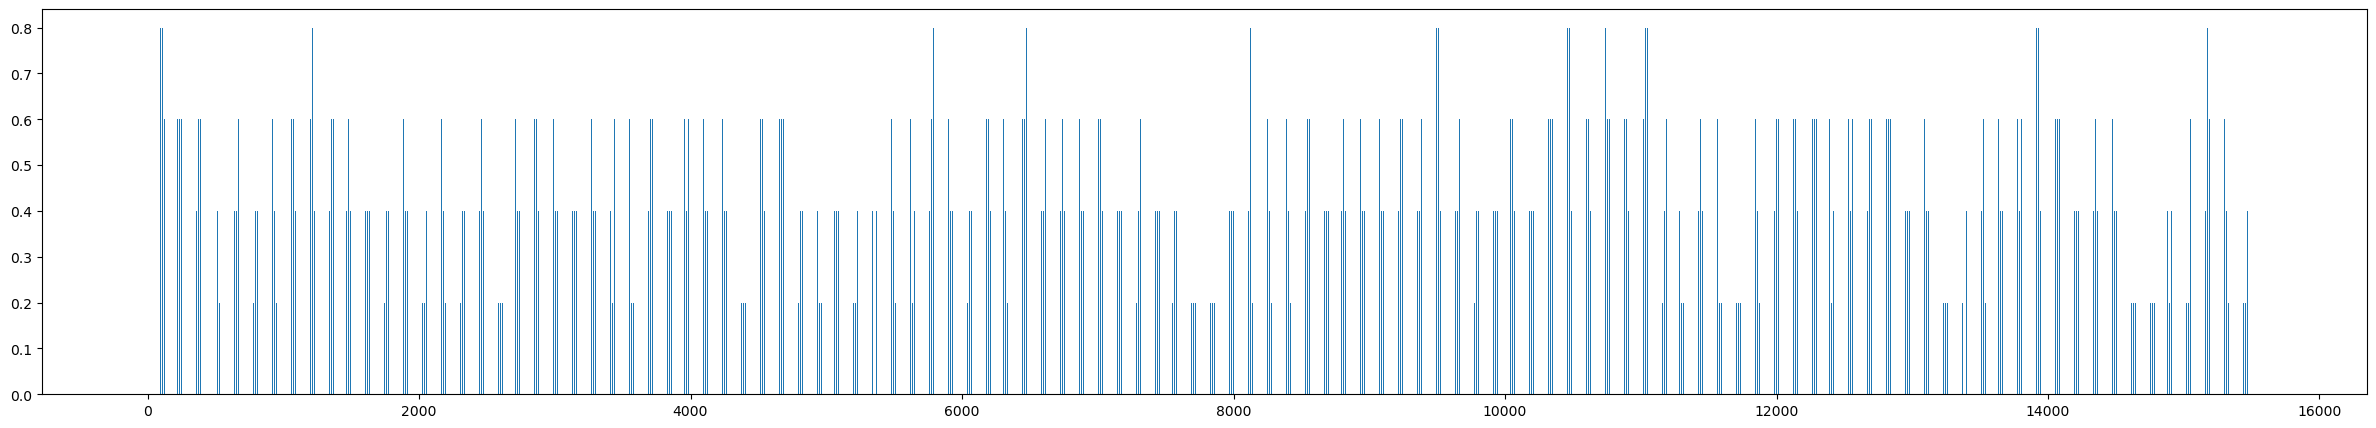

In [216]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 30,5
tempDF = pd.DataFrame(data=patternFinder['Yqhet_3k1bp.fasta'], columns=['Nucleotide', 'GCPerc'])
plt.bar(data=tempDF, x='Nucleotide', height='GCPerc')

<BarContainer object of 2860 artists>

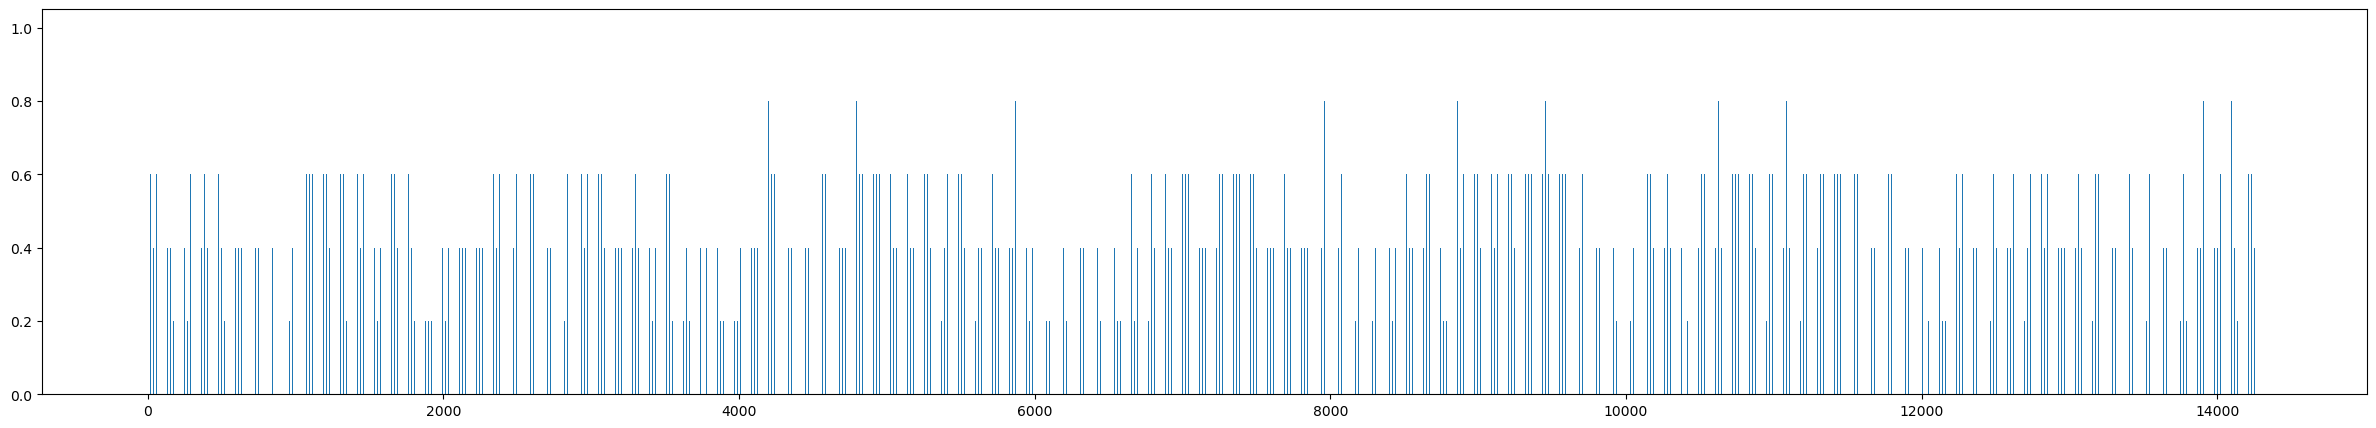

In [218]:
tempDF = pd.DataFrame(data=patternFinder['DYZ18_Yq.fasta'], columns=['Nucleotide', 'GCPerc'])
plt.bar(data=tempDF, x='Nucleotide', height='GCPerc')

<BarContainer object of 3580 artists>

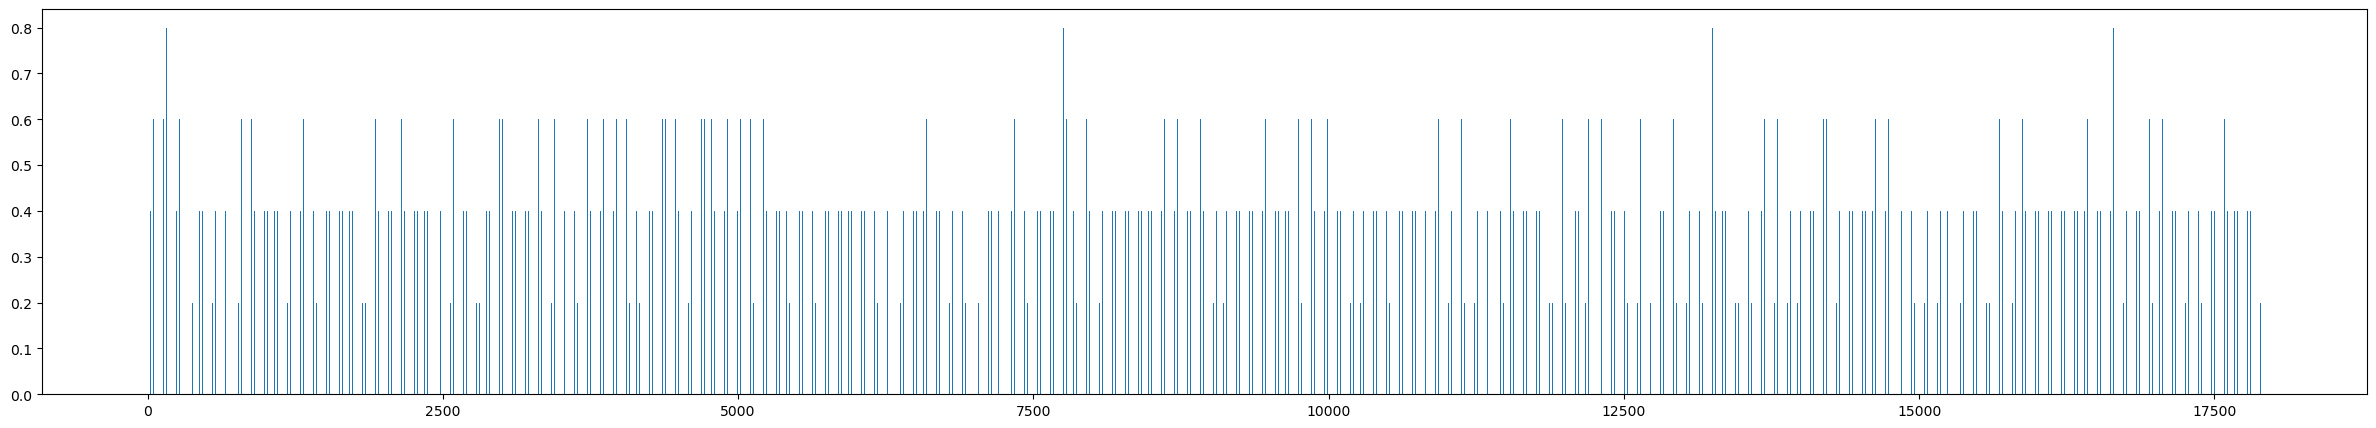

In [219]:
tempDF = pd.DataFrame(data=patternFinder['DYZ1_Yq.fasta'], columns=['Nucleotide', 'GCPerc'])
plt.bar(data=tempDF, x='Nucleotide', height='GCPerc')

<BarContainer object of 2760 artists>

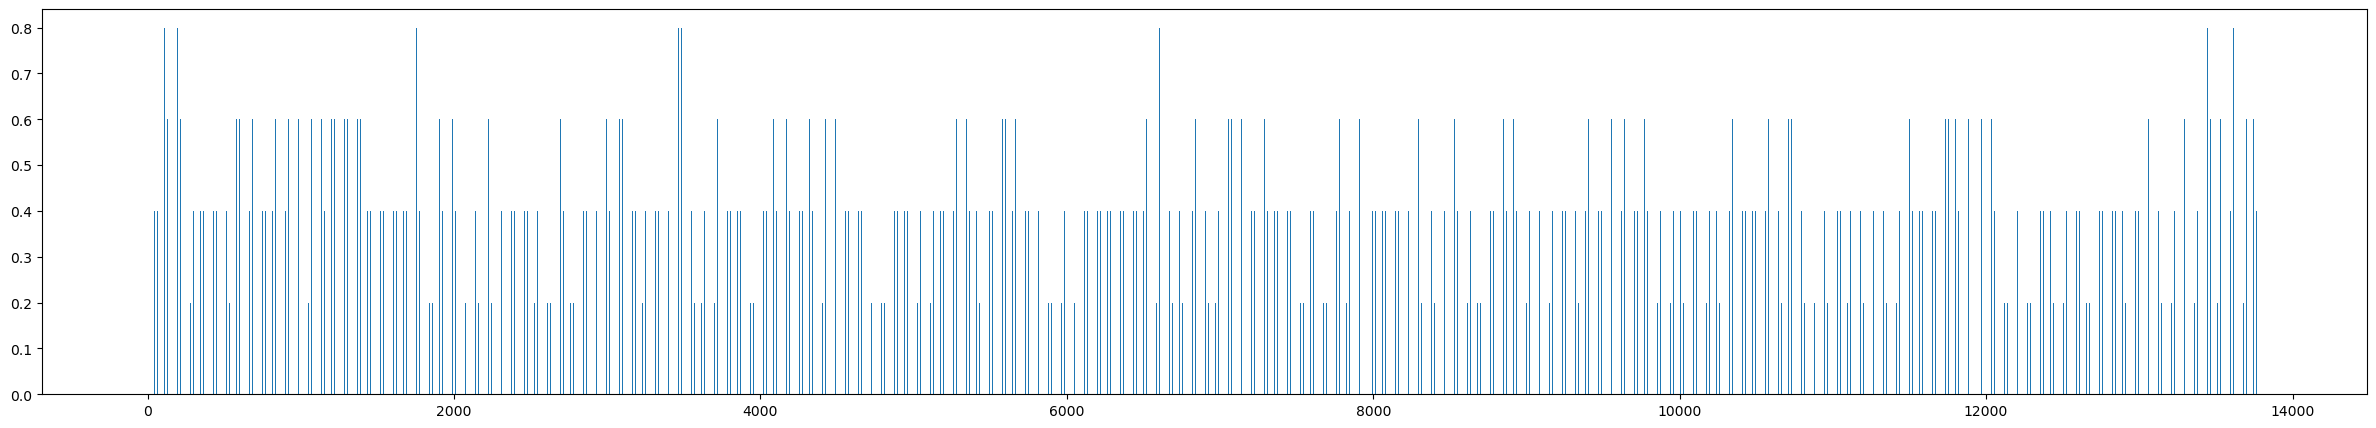

In [220]:
tempDF = pd.DataFrame(data=patternFinder['Yqhet_2k7bp.fasta'], columns=['Nucleotide', 'GCPerc'])
plt.bar(data=tempDF, x='Nucleotide', height='GCPerc')